In [1]:
import pandas as pd
import numpy as np

In [2]:
dataLst = []
with open("diabetes.txt", "r") as f:
    dataLst.append(f.readlines())

dataLst = [i[:-2].split() for i in dataLst[0]]

In [3]:
for i in dataLst:
    i[0] = int(i[0])
    for ind in range(1, len(i)):
        i[ind] = float(i[ind][2:])

In [4]:
data = pd.DataFrame(
    dataLst,
    columns=[
        "target",
        "pregnancies",
        "glucose",
        "bloodPressure",
        "skinThickness",
        "insulin",
        "bmi",
        "diabetesPedigreeFunc",
        "age",
    ],
)
data.head(10)

target  pregnancies  glucose  bloodPressure  skinThickness  insulin  \
0      -1          6.0    148.0           72.0           35.0      0.0   
1       1          1.0     85.0           66.0           29.0      0.0   
2      -1          8.0    183.0           64.0            0.0      0.0   
3       1          1.0     89.0           66.0           23.0     94.0   
4      -1          0.0    137.0           40.0           35.0    168.0   
5       1          5.0    116.0           74.0            0.0      0.0   
6      -1          3.0     78.0           50.0           32.0     88.0   
7       1         10.0    115.0            0.0            0.0      0.0   
8      -1          2.0    197.0           70.0           45.0    543.0   
9      -1          8.0    125.0           96.0            0.0      0.0   

         bmi  diabetesPedigreeFunc   age  
0  33.599998                 0.627  50.0  
1  26.600000                 0.351  31.0  
2  23.299999                 0.672  32.0  
3  28.100000                 0.167  21.0  
4  43.099998                 2.288  33.0  
5  25.600000                 0.201  30.0  
6  31.000000                 0.248  26.0  
7  35.299999                 0.134  29.0  
8  30.500000                 0.158  53.0  
9   0.000000                 0.232  54.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                768 non-null    int64  
 1   pregnancies           768 non-null    float64
 2   glucose               768 non-null    float64
 3   bloodPressure         768 non-null    float64
 4   skinThickness         768 non-null    float64
 5   insulin               768 non-null    float64
 6   bmi                   768 non-null    float64
 7   diabetesPedigreeFunc  768 non-null    float64
 8   age                   768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [6]:
data.describe()

target  pregnancies     glucose  bloodPressure  skinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean     0.302083     3.845052  120.894531      69.105469      20.536458   
std      0.953903     3.369578   31.972618      19.355807      15.952218   
min     -1.000000     0.000000    0.000000       0.000000       0.000000   
25%     -1.000000     1.000000   99.000000      62.000000       0.000000   
50%      1.000000     3.000000  117.000000      72.000000      23.000000   
75%      1.000000     6.000000  140.250000      80.000000      32.000000   
max      1.000000    17.000000  199.000000     122.000000      99.000000   

          insulin         bmi  diabetesPedigreeFunc         age  
count  768.000000  768.000000            768.000000  768.000000  
mean    79.799479   31.992578              0.471876   33.240885  
std    115.244002    7.884160              0.331329   11.760232  
min      0.000000    0.000000              0.078000   21.000000  
25%      0.000000   27.299999              0.243750   24.000000  
50%     30.500000   32.000000              0.372500   29.000000  
75%    127.250000   36.599998              0.626250   41.000000  
max    846.000000   67.099998              2.420000   81.000000

In [7]:
data.isna().sum()

target                  0
pregnancies             0
glucose                 0
bloodPressure           0
skinThickness           0
insulin                 0
bmi                     0
diabetesPedigreeFunc    0
age                     0
dtype: int64

# EDA

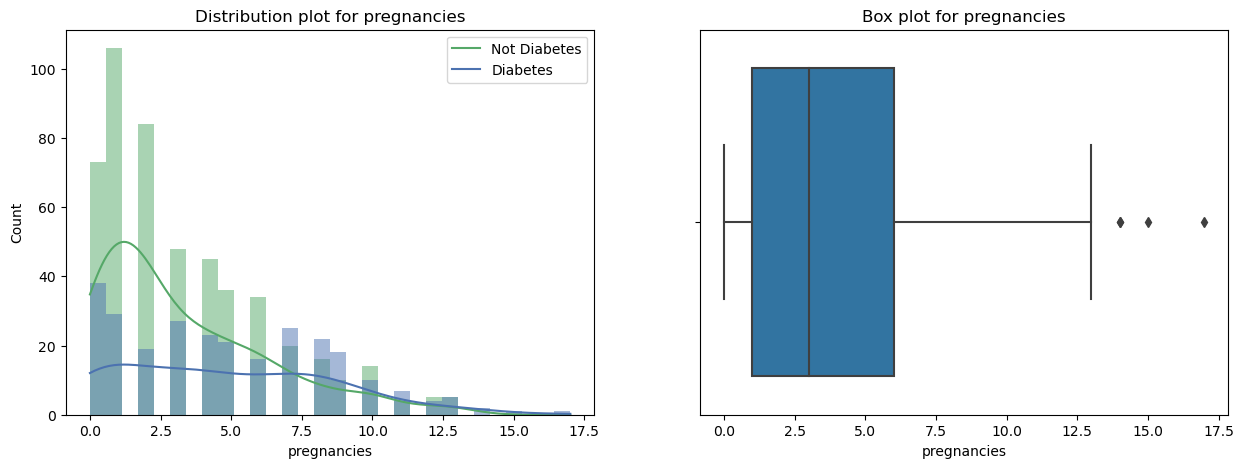

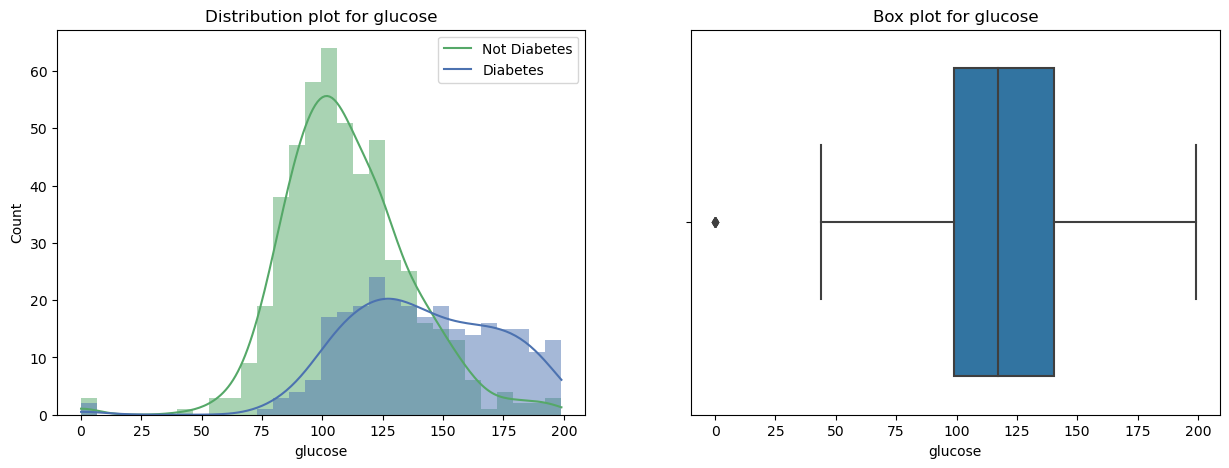

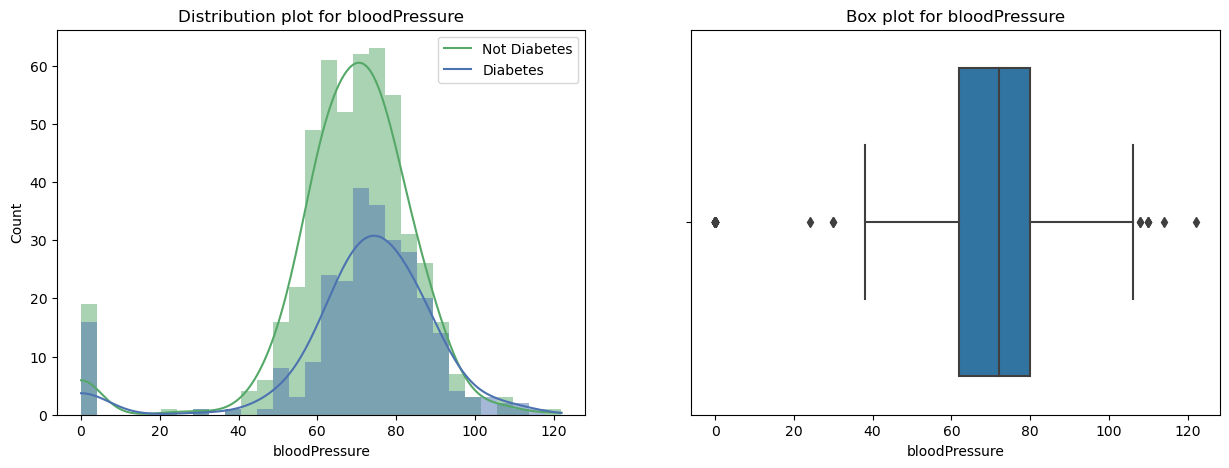

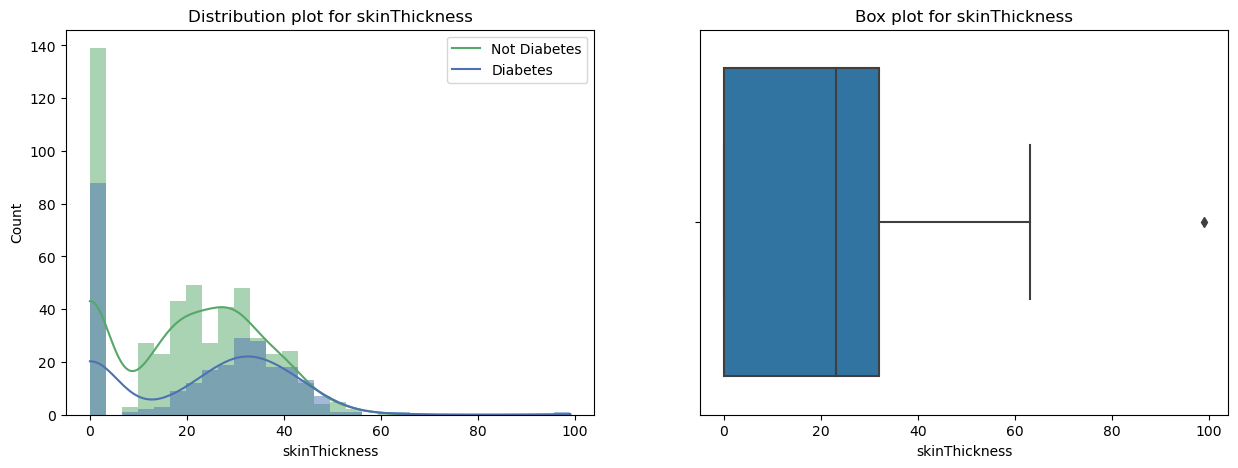

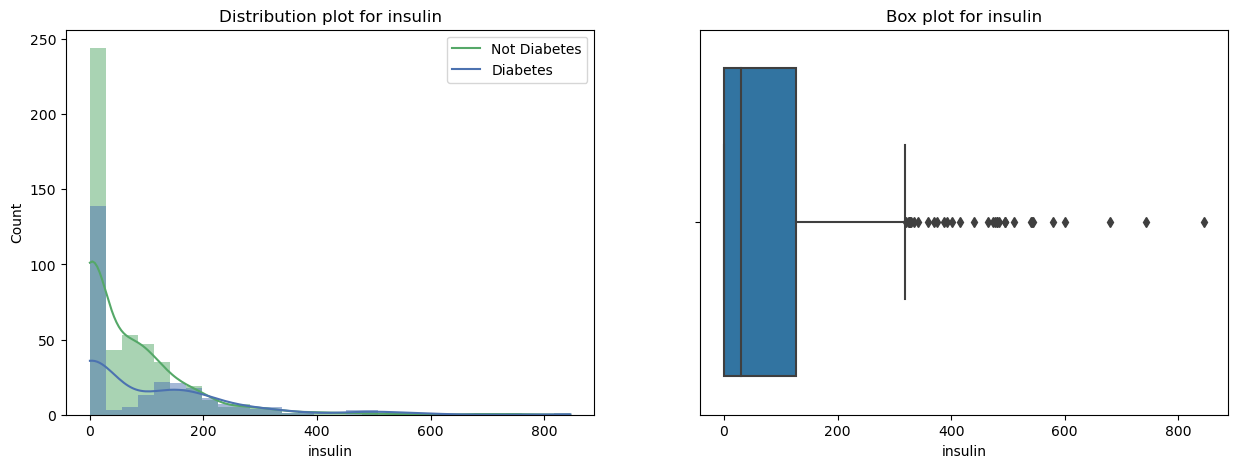

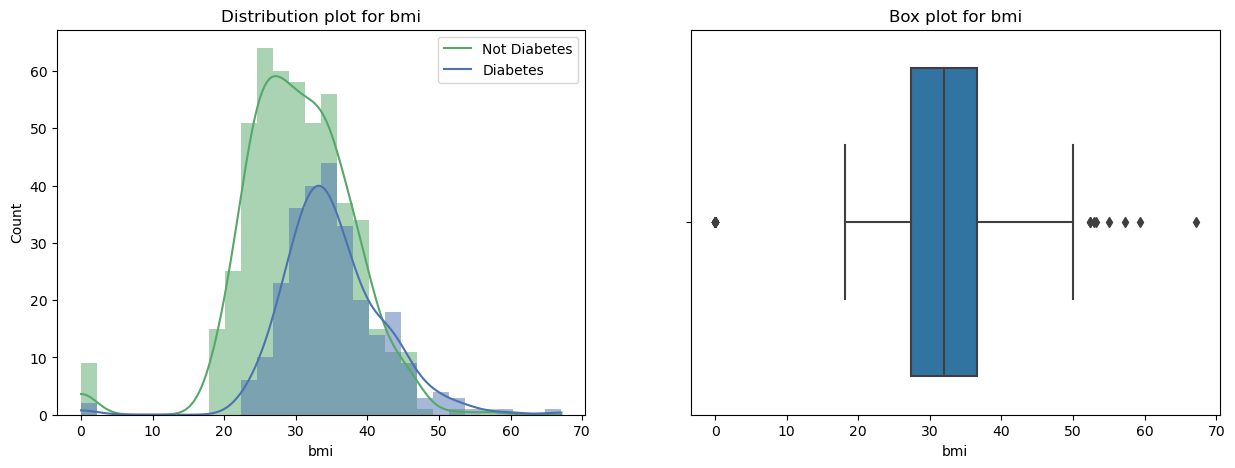

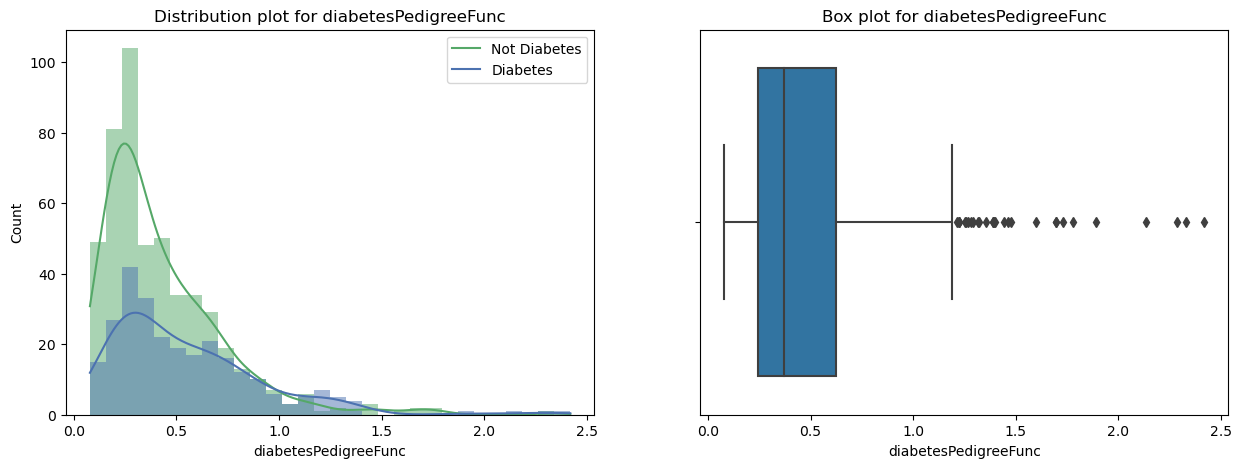

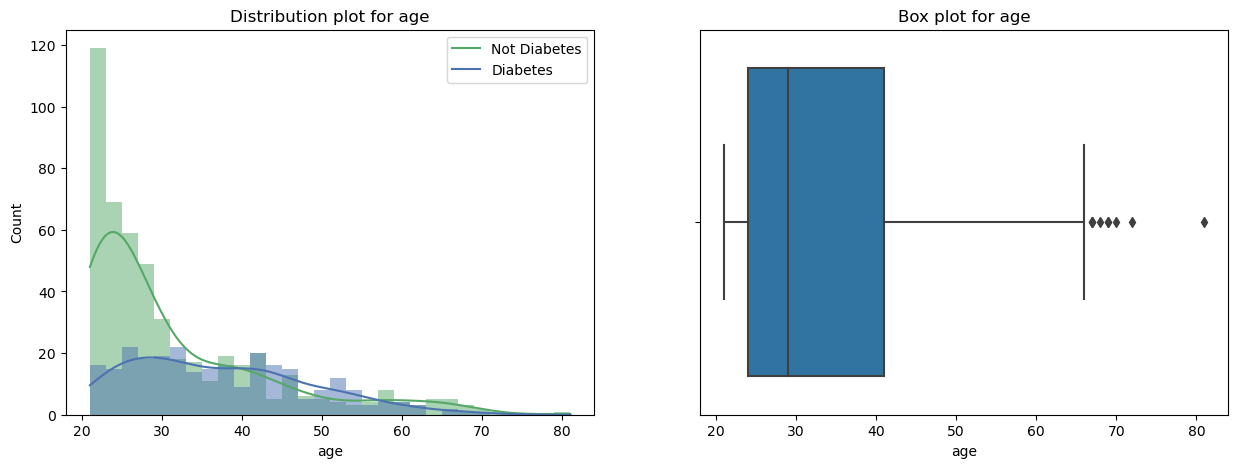

In [735]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = list(data.columns)
cols.remove("target")


def distplot(data, col, ax):
    sns.histplot(
        data,
        x=col,
        hue="target",
        kde=True,
        linewidth=0,
        bins=30,
        palette="deep6",
        legend=False,
        ax=ax[0],
    )
    ax[0].legend(["Not Diabetes", "Diabetes"])
    ax[0].set_title("Distribution plot for " + col)


def boxplot(data, col, ax):
    sns.boxplot(data, x=col, ax=ax[1])
    ax[1].set_title("Box plot for " + col)


for col in cols:
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    distplot(data, col, ax)
    boxplot(data, col, ax)
    plt.plot()

In [496]:
preprocData = data.copy()

preprocData["glucose"] = np.where(
    preprocData["glucose"] == 0, preprocData["glucose"].mean(), preprocData["glucose"]
)
preprocData["bloodPressure"] = np.where(
    preprocData["bloodPressure"] == 0,
    preprocData["bloodPressure"].mean(),
    preprocData["bloodPressure"],
)
preprocData["skinThickness"] = np.where(
    preprocData["skinThickness"] == 0,
    preprocData["skinThickness"].median(),
    preprocData["skinThickness"],
)
preprocData["insulin"] = np.where(
    preprocData["insulin"] == 0, preprocData["insulin"].mean(), preprocData["insulin"]
)
preprocData["bmi"] = np.where(
    preprocData["bmi"] == 0, preprocData["bmi"].median(), preprocData["bmi"]
)

In [497]:
def treat_outliers(data, col, upper=False, lower=False):
    values = data[col]

    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    iqr = q3 - q1

    lowerWhisker = q1 - 1.5 * iqr
    upperWhisker = q3 + 1.5 * iqr

    if lower:
        data[col] = np.where(values < lowerWhisker, values.quantile(0.05), data[col])

    if upper:
        data[col] = np.where(values > upperWhisker, values.quantile(0.95), data[col])


treat_outliers(preprocData, "pregnancies", upper=True)
treat_outliers(preprocData, "bloodPressure", lower=True, upper=True)
treat_outliers(preprocData, "skinThickness", upper=True)
treat_outliers(preprocData, "insulin", upper=True)
treat_outliers(preprocData, "bmi", upper=True)
treat_outliers(preprocData, "diabetesPedigreeFunc", upper=True)
treat_outliers(preprocData, "age", upper=True)

In [498]:
# for col in cols:
#     fig, ax = plt.subplots(1, 2)
#     fig.set_size_inches(15, 5)
#     distplot(preprocData, col, ax)
#     boxplot(preprocData, col, ax)
#     plt.plot()

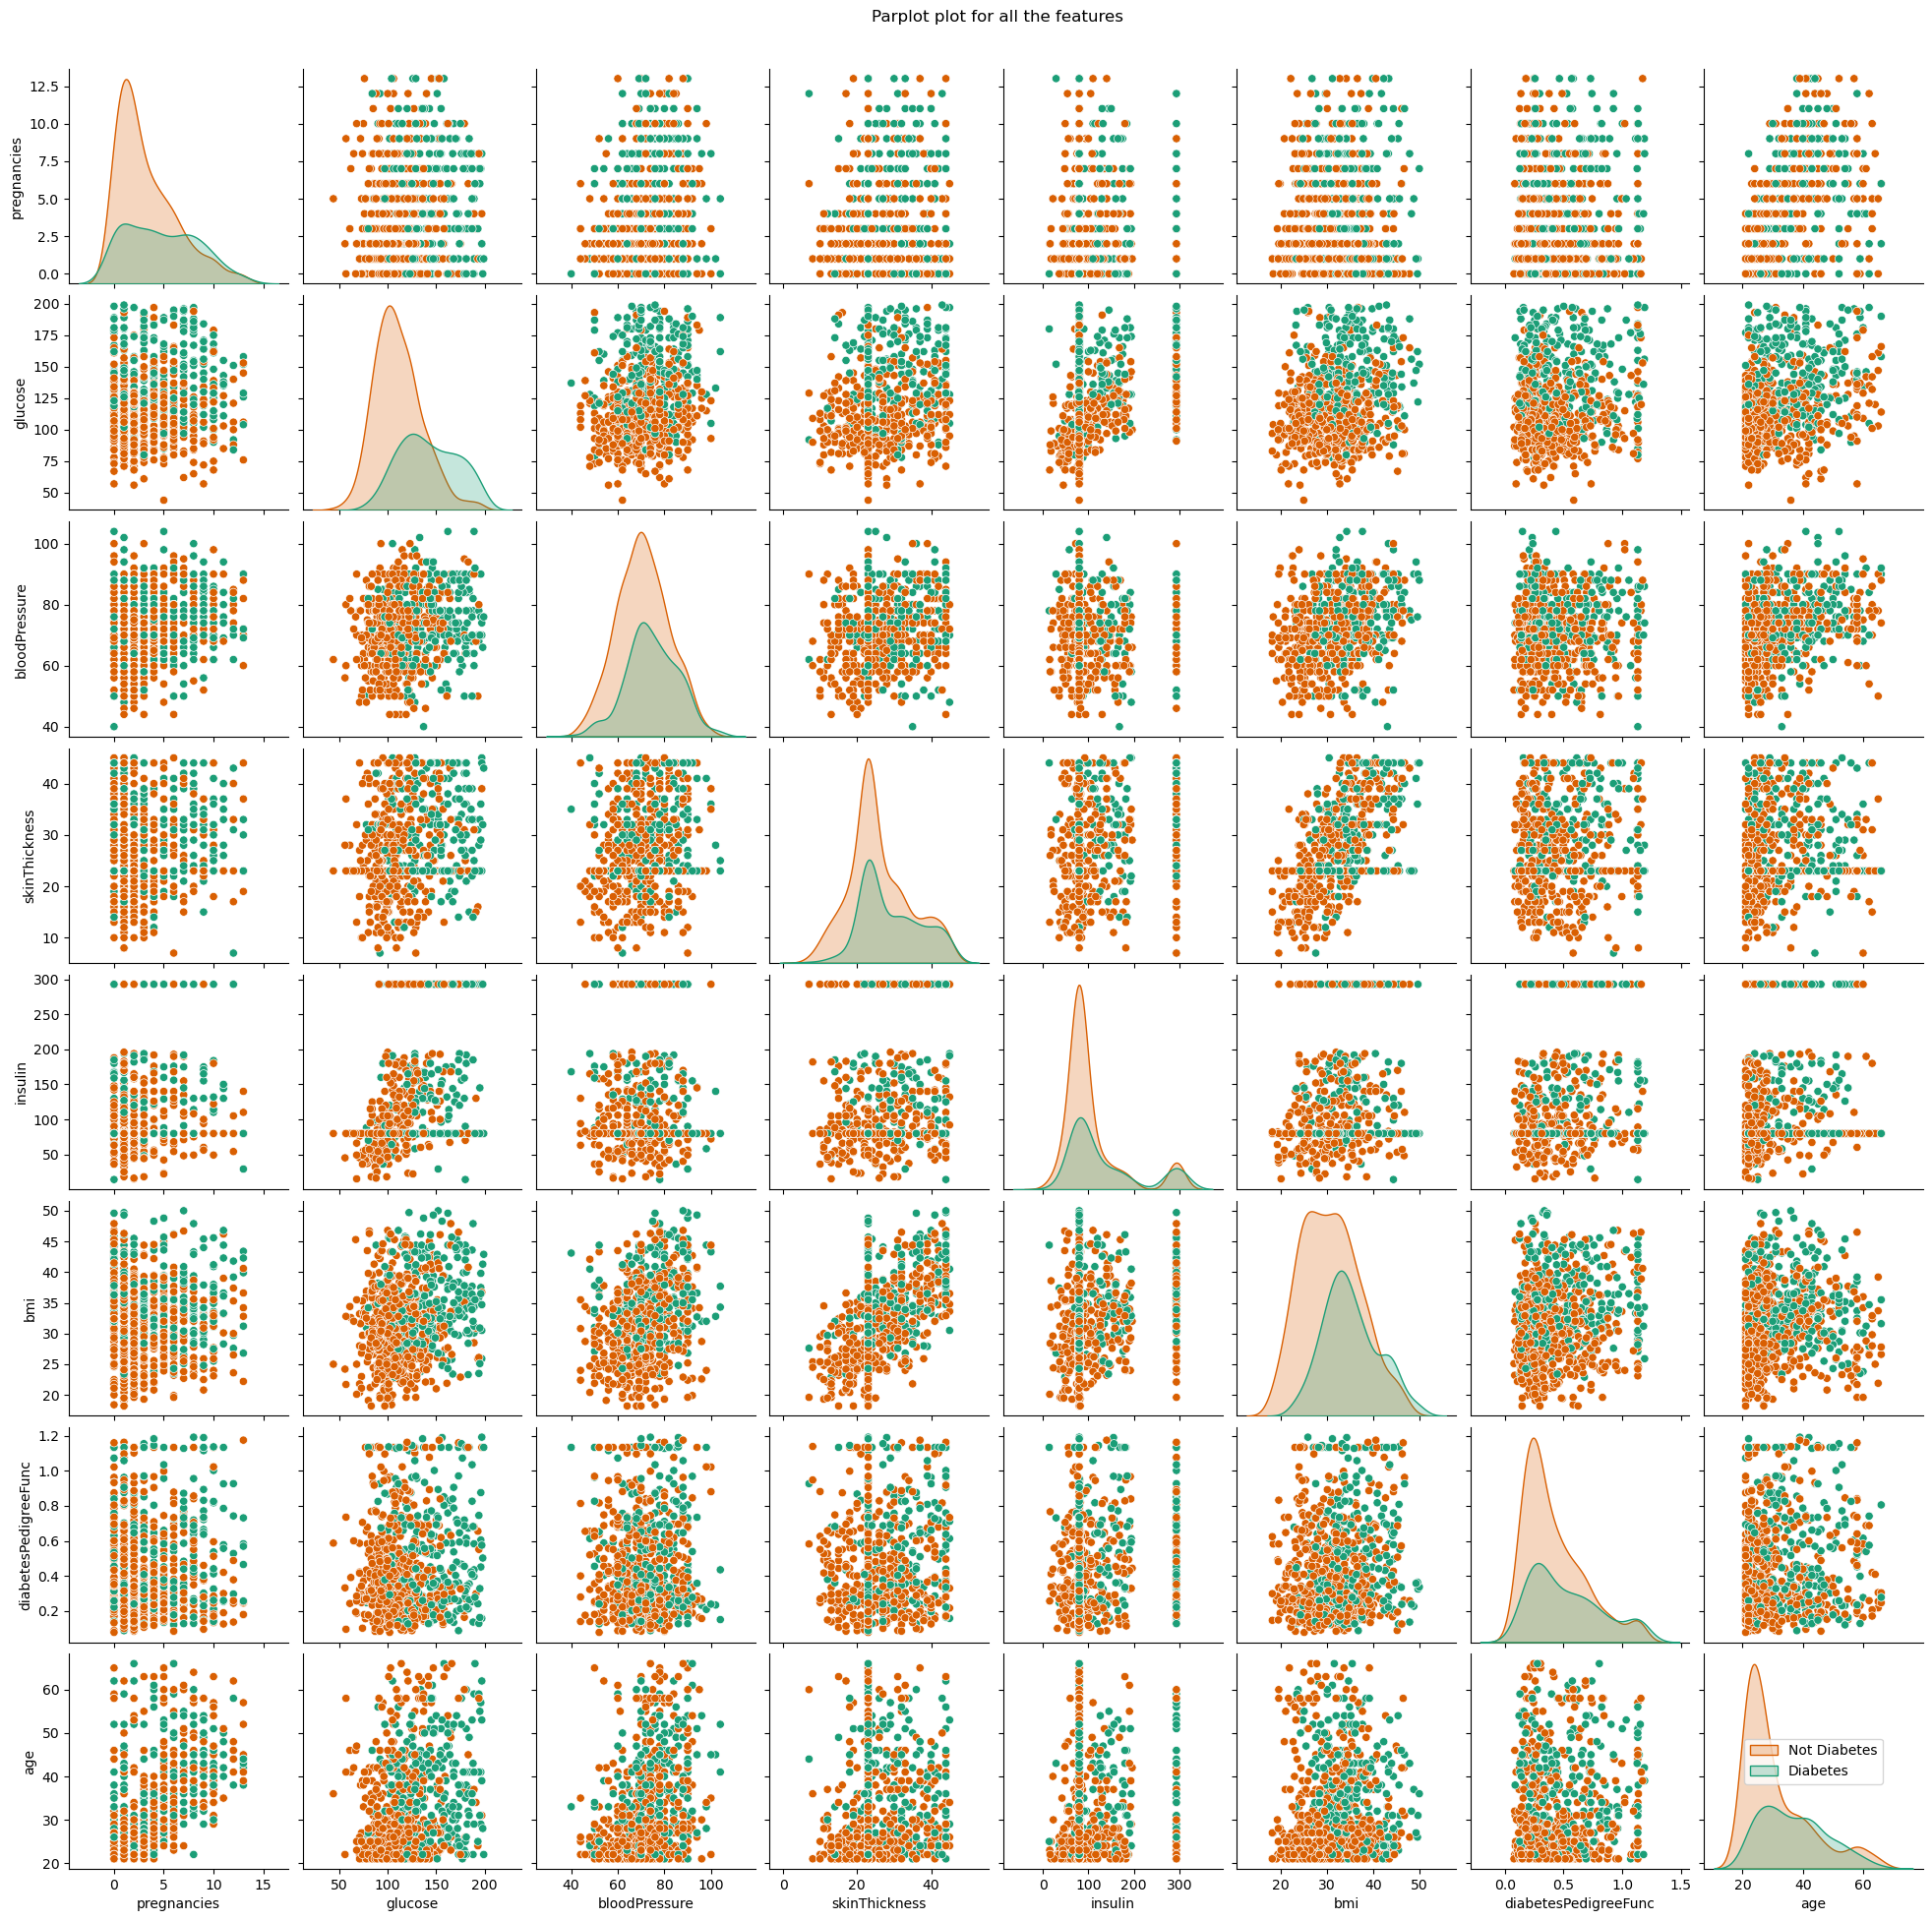

In [736]:
pp = sns.pairplot(preprocData, hue="target", palette="Dark2")
pp._legend.remove()
plt.subplots_adjust(top=0.95)
plt.suptitle("Parplot plot for all the features")
plt.legend(["Not Diabetes", "Diabetes"], loc='center')
plt.show()

<Axes: >

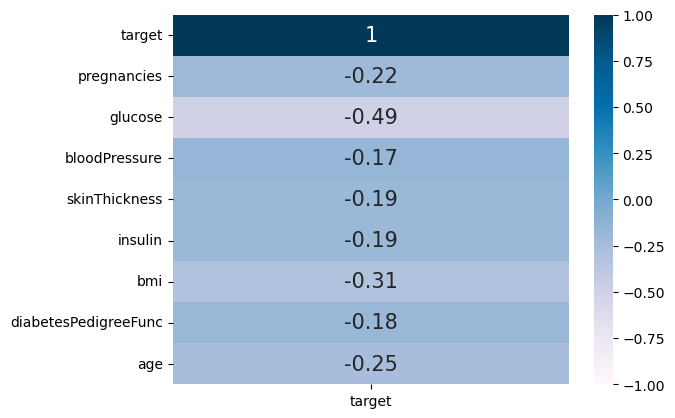

In [500]:
sns.heatmap(
    preprocData.corr()[["target"]],
    cmap="PuBu",
    annot=True,
    annot_kws={"size": 15},
    vmin=-1,
)

Text(0.5, 1.0, 'Impact of Glucose and BMI on Diabetes')

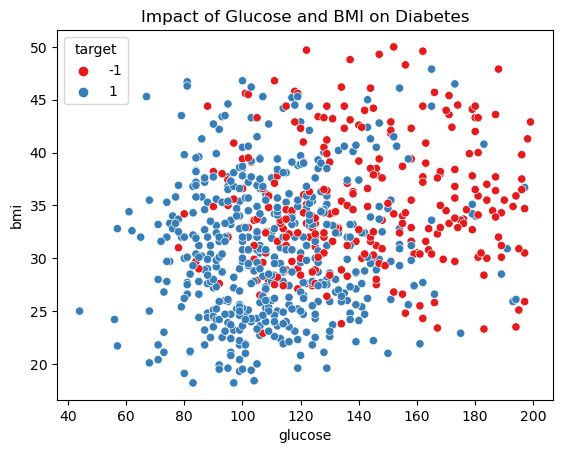

In [501]:
sp = sns.scatterplot(preprocData, x="glucose", y="bmi", hue="target", palette="Set1")
plt.title("Impact of Glucose and BMI on Diabetes")

Text(0.5, 1.0, 'Impact of Glucose and Age on Diabetes')

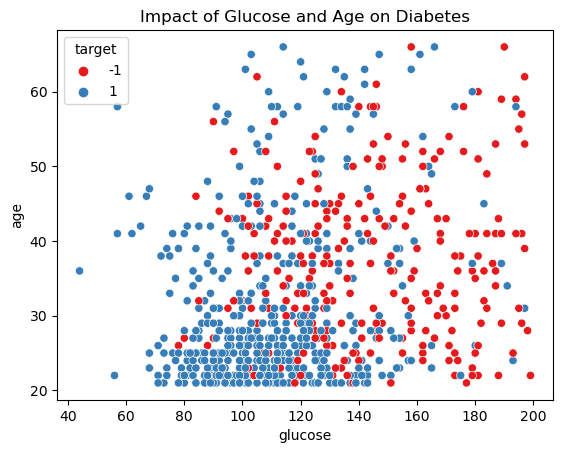

In [502]:
sns.scatterplot(preprocData, x="glucose", y="age", hue="target", palette="Set1")
plt.title("Impact of Glucose and Age on Diabetes")

Text(0.5, 1.0, 'Impact of BMI and Age on Diabetes')

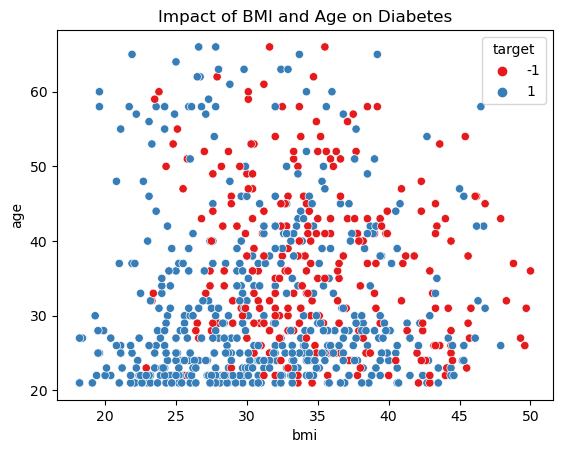

In [503]:
sns.scatterplot(preprocData, x="bmi", y="age", hue="target", palette="Set1")
plt.title("Impact of BMI and Age on Diabetes")

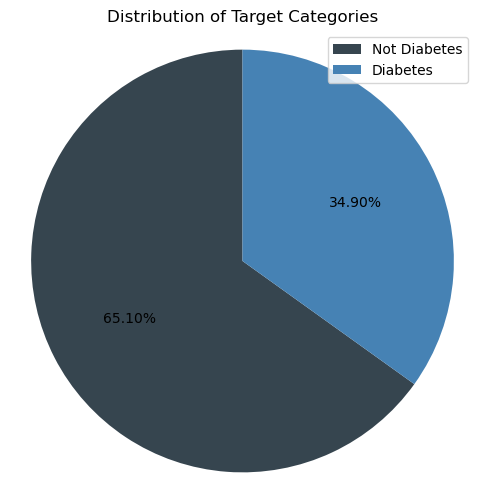

In [504]:
plt.figure(figsize=(6, 6))
plt.pie(
    preprocData["target"].value_counts(),
    autopct="%1.2f%%",
    startangle=90,
    colors=["#36454F", "#4682B4"],
)
plt.title("Distribution of Target Categories")
plt.axis("equal")
plt.legend(["Not Diabetes", "Diabetes"])

plt.show()

# Modelling

In [642]:
x = preprocData.drop("target", axis=1).values
y = preprocData["target"].values

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [643]:

from imblearn.over_sampling import SMOTE

oversampler = SMOTE(sampling_strategy='auto', random_state=42)

xTResampled, yTResampled = oversampler.fit_resample(xTrain, yTrain)

In [644]:
print("Train set shapes x :", xTResampled.shape, ", y :", yTResampled.shape)
print("Test set shapes x :", xTest.shape, ", y :", yTest.shape)

Train set shapes x : (800, 8) , y : (800,)
Test set shapes x : (154, 8) , y : (154,)


In [645]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xTrainScaled = scaler.fit_transform(xTResampled)
xTestScaled = scaler.transform(xTest)

In [646]:
import torch
from torch.utils.data import DataLoader, Dataset


class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.data[idx])
        y = torch.LongTensor([self.labels[idx]])
        return x, y

In [647]:
batch_size = 8

trainDataset = CustomDataset(xTrainScaled, yTResampled)
trainLoader = DataLoader(trainDataset, batch_size=batch_size)

testDataset = CustomDataset(xTestScaled, yTest)
testLoader = DataLoader(testDataset, batch_size=batch_size)

for x, y in trainLoader:
    print("Shape & type of x: ", x.shape, x.dtype)
    print("Shape & type of y: ", y.shape, y.dtype)
    break

Shape & type of x:  torch.Size([8, 8]) torch.float32
Shape & type of y:  torch.Size([8, 1]) torch.int64


In [648]:
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [649]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support


def calc_metrics(yTrue, yPred):
    precision, recall, f1, _ = precision_recall_fscore_support(
        yTrue, yPred, zero_division=0, average='weighted'
    )

    return precision, recall


def calc_mean_metrics(metrics):
    meanMetrics = {}

    for key, lst in metrics.items():
        meanMetrics[key] = round(sum(lst) / len(lst), 2) if len(lst) > 0 else 0

    return meanMetrics

In [671]:
def train(dataloader, model, loss_fn, optimizer, l1RegLambda = 0.001):
    model.train()

    result = {"loss": [], "accuracy": [], "recall": [], "precision": []}

    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)

        pred = model(x)
        # y = y.detach().float()
        # print(pred.shape, y.shape)
        loss = loss_fn(pred, y.float())

        optimizer.zero_grad()

        l1Reg = 0
        for param in model.parameters():
            l1Reg += torch.norm(param, p=1)
        
        total_loss = loss + l1RegLambda * l1Reg

        total_loss.backward()
        optimizer.step()

        binaryPred = torch.where(pred >= 0, 1, -1)
        prec, rec = calc_metrics(y, binaryPred)

        correct = (binaryPred == y).sum().item()

        acc = 100 * correct / y.size(0)

        result["loss"].append(loss.item())
        result["accuracy"].append(acc)
        result["precision"].append(prec)
        result["recall"].append(rec)

        # if batch % 10 == 0:
        #     print(loss.item(), acc, prec, rec)

    meanMetrics = calc_mean_metrics(result)

    return meanMetrics

In [672]:
##Define a test function
def test(dataloader, model, loss_fn):
    model.eval()

    testResult = {"loss": [], "accuracy": [], "recall": [], "precision": []}

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            testLoss = loss_fn(pred, y.float())
            # correct += (pred.argmax(1) == y).type(torch.float)

            binaryPred = torch.where(pred >= 0, 1, -1)
            testPrec, testRec = calc_metrics(y, binaryPred)

            correct = (binaryPred == y).sum().item()

            testAcc = 100 * correct / y.size(0)

            testResult["loss"].append(testLoss.item())
            testResult["accuracy"].append(testAcc)
            testResult["precision"].append(testPrec)
            testResult["recall"].append(testRec)

    testMeanMetrics = calc_mean_metrics(testResult)
    return testMeanMetrics

In [730]:
def fit_and_evaluate(model, trainLoader, testLoader, criterion, optimiser, l1RegLambda = 0.001, epochs=100, save = False):
    trainMetrics = []
    testMetrics = []

    bestTestAcc = 0
    for t in range(epochs):
        if (t + 1) % 50 == 0: print(f"Epoch {t+1}") 
        trainMetric = train(trainLoader, model, criterion, optimiser, l1RegLambda)
        testMetric = test(testLoader, model, criterion)
        trainMetrics.append(trainMetric)
        testMetrics.append(testMetric)

        if bestTestAcc < testMetrics[-1]['accuracy']:
            torch.save( model.state_dict(), './best_model.pth')
            bestTestAcc = testMetrics[-1]['accuracy']


    print("------------------")
    print(f"Train Metrics: \n {trainMetrics} \n")
    print(f"Test Metrics: \n {testMetrics} \n")

    return trainMetrics, testMetrics

In [674]:
class BaseNetwork(nn.Module):
    def __init__(self, l1=32, l2=16, out=1):
        super(BaseNetwork, self).__init__()

        self.fc1 = nn.Linear(8, l1)
        # self.fc2 = nn.Linear(l1, l2)
        self.out = nn.Linear(l1, out)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        out = F.sigmoid(self.out(x))

        return out

In [675]:
baseNetwork = BaseNetwork(4)
print(baseNetwork)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
baseNetwork.to(device)

BaseNetwork(
  (fc1): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)
cpu


BaseNetwork(
  (fc1): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)

In [676]:
import torch.optim as optim

# HingeEmbeddingLoss
criterion = nn.BCELoss()
optimiser = optim.SGD(baseNetwork.parameters(), lr=0.01)

In [677]:
trainMetrics, testMetrics = fit_and_evaluate(
    baseNetwork, trainLoader, testLoader, criterion, optimiser, 100
)

Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.38, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -0.19, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -0.43, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -0.65, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -0.92, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -1.31, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -1.86, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -2.6, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -3.03, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -3.3, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -3.56, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -3.84, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.35}, {'loss': -4.16, 'accuracy': 50.0, 'recall': 0.5

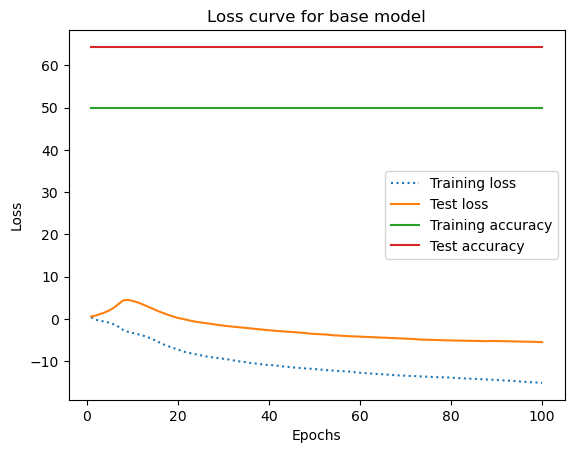

In [678]:
trainLosses = [i['loss'] for i in trainMetrics]
testLosses = [i['loss'] for i in testMetrics]

trainAccuracies = [i['accuracy'] for i in trainMetrics]
testAccuracies = [i['accuracy'] for i in testMetrics]
epochs = 100


plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve for base model")
plt.xticks = range(1, epochs + 1)
plt.locator_params(axis='x', integer=True)

plt.plot(range(1, epochs + 1), trainLosses, label = 'Training loss', linestyle='dotted')
plt.plot(range(1, epochs + 1), testLosses, label = 'Test loss')

plt.plot(range(1, epochs + 1), trainAccuracies, label = 'Training accuracy')
plt.plot(range(1, epochs + 1), testAccuracies, label = 'Test accuracy')

plt.legend()
plt.show()

In [723]:
def plot_curves(trainMetrics, testMetrics, lr, l1Lambda, l2wd, acc = False):
    trainLosses = [i['loss'] for i in trainMetrics]
    testLosses = [i['loss'] for i in testMetrics]

    trainAccuracies = [i['accuracy'] for i in trainMetrics]
    testAccuracies = [i['accuracy'] for i in testMetrics]

    if acc:
        print(f"Maximum train accuracy - {max(trainAccuracies)} and maximum test accuracy is - {max(testAccuracies)}")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss curve for improved model with LR-{lr}, L1Norm-{l1Lambda}, L2Norm-{l2wd}")
    plt.xticks = range(1, epochs + 1)
    plt.locator_params(axis='x', integer=True)

    plt.plot(range(1, epochs + 1), trainLosses, label = 'Training loss', linestyle='dotted')
    plt.plot(range(1, epochs + 1), testLosses, label = 'Test loss')

    plt.plot(range(1, epochs + 1), trainAccuracies, label = 'Training accuracy')
    plt.plot(range(1, epochs + 1), testAccuracies, label = 'Test accuracy')

    plt.legend()
    plt.show()

In [692]:
class ImprovedNetwork(nn.Module):
    def __init__(self, out=1):
        super(ImprovedNetwork, self).__init__()

        self.fc1 = nn.Linear(8, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.norm1 = nn.BatchNorm1d(16)
        self.norm2 = nn.BatchNorm1d(8)
        self.drop = nn.Dropout(0.25)
        self.out = nn.Linear(8, out)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.norm1(F.relu(self.fc2(x)))
        x = self.drop(x)
        x = self.norm2(F.relu(self.fc3(x)))
        out = self.out(x)

        return out

In [715]:
improvedNetwork = ImprovedNetwork()
# print(improvedNetwork)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
improvedNetwork.to(device)

cpu


ImprovedNetwork(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (norm1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.25, inplace=False)
  (out): Linear(in_features=8, out_features=1, bias=True)
)

nadam, adagrad, adadelta

In [716]:
import torch.optim as optim

# HingeEmbeddingLoss
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.Adagrad(improvedNetwork.parameters(), lr=0.01, weight_decay=1e-5)

In [717]:
epochs = 100
trainMetrics, testMetrics = fit_and_evaluate(
    improvedNetwork, trainLoader, testLoader, criterion, optimiser, epochs
)

Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.61, 'accuracy': 56.5, 'recall': 0.56, 'precision': 0.71}, {'loss': 0.68, 'accuracy': 50.25, 'recall': 0.5, 'precision': 0.38}, {'loss': 0.69, 'accuracy': 46.25, 'recall': 0.46, 'precision': 0.31}, {'loss': 0.69, 'accuracy': 50.75, 'recall': 0.51, 'precision': 0.36}, {'loss': 0.69, 'accuracy': 50.5, 'recall': 0.5, 'precision': 0.35}, {'loss': 0.69, 'accuracy': 48.75, 'recall': 0.49, 'precision': 0.34}, {'loss': 0.69, 'accuracy': 49.5, 'recall': 0.5, 'precision': 0.34}, {'loss': 0.69, 'accuracy': 50.75, 'recall': 0.51, 'precision': 0.36}, {'loss': 0.69, 'accuracy': 50.5, 'recall': 0.5, 'precision': 0.35}, {'loss': 0.69, 'accuracy': 47.75, 'recall': 0.48, 'precision': 0.33}, {'loss': 0.69, 'accuracy': 49.5, 'recall': 0.5, 'precision': 0.34}, {'loss': 0.69, 'accuracy': 51.25, 'recall': 0.51, 'precision': 0.36}, {'loss': 0.69, 'accuracy': 50.5, 'recall': 0.5, 'precision': 0.35}, {'loss': 0.69, 'accuracy': 47.75, 'recall': 0.

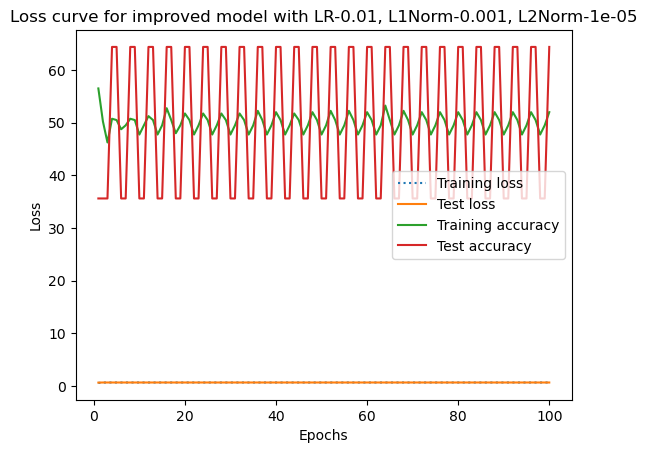

In [718]:
plot_curves(trainMetrics, testMetrics, 0.01, 0.001, 1e-5)

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.01, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.13, 'accuracy': 56.12, 'recall': 0.56, 'precision': 0.71}, {'loss': -0.92, 'accuracy': 51.88, 'recall': 0.52, 'precision': 0.55}, {'loss': -2.4, 'accuracy': 54.12, 'recall': 0.54, 'precision': 0.67}, {'loss': -4.37, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.64}, {'loss': -6.41, 'accuracy': 54.88, 'recall': 0.55, 'precision': 0.71}, {'loss': -9.49, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.61}, {'loss': -10.58, 'accuracy': 54.5, 'recall': 0.55, 'precision': 0.73}, {'loss': -15.48, 'accuracy': 55.25, 'recall': 0.55, 'precision': 0.75}, {'loss': -18.43, 'accuracy': 52.12, 'recall': 0.52, 'precision': 0.67}, {'loss': -20.14, 'accuracy': 54.0, 'recall': 0.54, 'precision': 0.72}, {'loss': -24.16, 'accuracy': 55.38, 'recall': 0.55, 'precision': 0.7}, {'loss': -29.07, 'accuracy': 55.88, 'recall': 0.56, 'precision': 0.69}

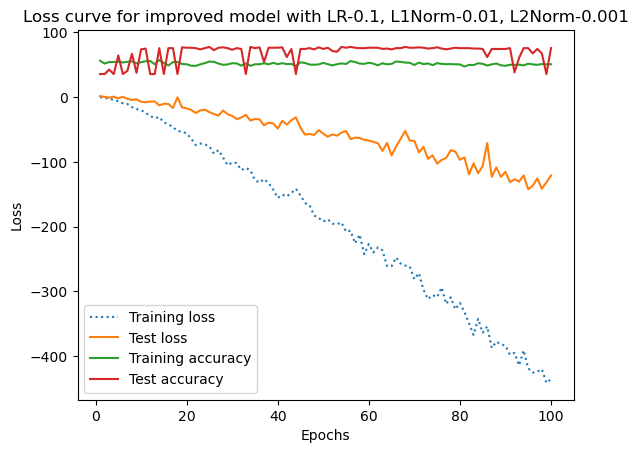

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.001, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.6, 'accuracy': 59.88, 'recall': 0.6, 'precision': 0.75}, {'loss': -2.6, 'accuracy': 54.5, 'recall': 0.55, 'precision': 0.59}, {'loss': -5.33, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.62}, {'loss': -8.47, 'accuracy': 53.12, 'recall': 0.53, 'precision': 0.61}, {'loss': -13.26, 'accuracy': 52.75, 'recall': 0.53, 'precision': 0.64}, {'loss': -15.6, 'accuracy': 50.88, 'recall': 0.51, 'precision': 0.58}, {'loss': -21.87, 'accuracy': 53.0, 'recall': 0.53, 'precision': 0.62}, {'loss': -25.54, 'accuracy': 55.0, 'recall': 0.55, 'precision': 0.68}, {'loss': -27.33, 'accuracy': 52.88, 'recall': 0.53, 'precision': 0.63}, {'loss': -33.75, 'accuracy': 52.0, 'recall': 0.52, 'precision': 0.6}, {'loss': -37.48, 'accuracy': 49.62, 'recall': 0.5, 'precision': 0.63}, {'loss': -44.18, 'accuracy': 52.25, 'recall': 0.52, 'precision': 0.65}, 

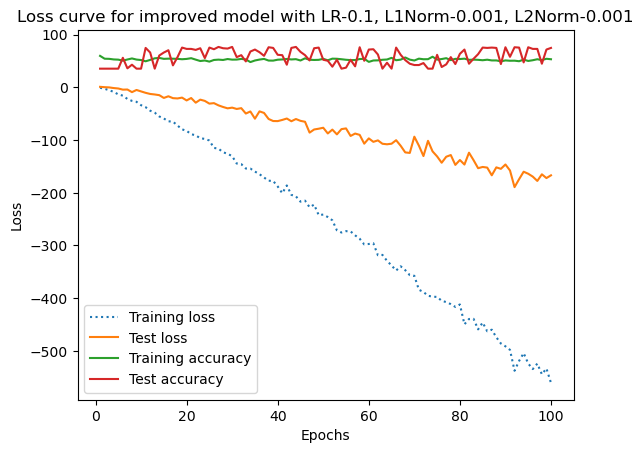

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.0001, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.9, 'accuracy': 65.38, 'recall': 0.65, 'precision': 0.8}, {'loss': -3.04, 'accuracy': 55.5, 'recall': 0.56, 'precision': 0.73}, {'loss': -5.76, 'accuracy': 56.38, 'recall': 0.56, 'precision': 0.74}, {'loss': -9.67, 'accuracy': 56.5, 'recall': 0.56, 'precision': 0.79}, {'loss': -12.98, 'accuracy': 55.88, 'recall': 0.56, 'precision': 0.79}, {'loss': -17.06, 'accuracy': 55.5, 'recall': 0.56, 'precision': 0.72}, {'loss': -20.27, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.69}, {'loss': -25.44, 'accuracy': 53.75, 'recall': 0.54, 'precision': 0.64}, {'loss': -28.72, 'accuracy': 52.62, 'recall': 0.53, 'precision': 0.63}, {'loss': -34.01, 'accuracy': 50.5, 'recall': 0.5, 'precision': 0.52}, {'loss': -38.7, 'accuracy': 51.0, 'recall': 0.51, 'precision': 0.6}, {'loss': -41.42, 'accuracy': 52.88, 'recall': 0.53, 'precision': 0.63},

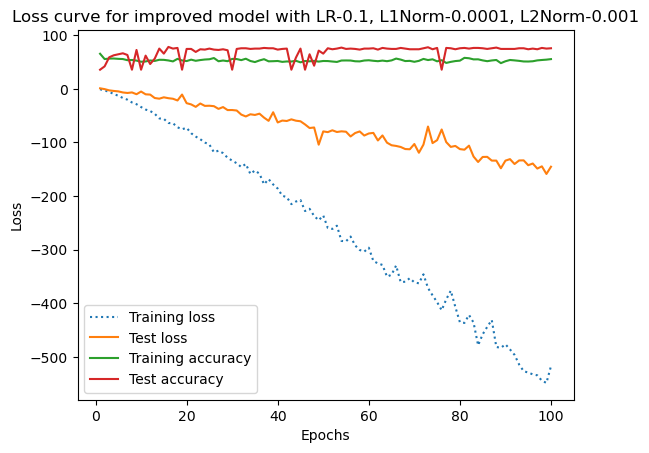

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.01, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.56, 'accuracy': 64.5, 'recall': 0.64, 'precision': 0.78}, {'loss': -2.07, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.56}, {'loss': -3.72, 'accuracy': 55.38, 'recall': 0.55, 'precision': 0.61}, {'loss': -7.1, 'accuracy': 54.88, 'recall': 0.55, 'precision': 0.64}, {'loss': -8.16, 'accuracy': 54.12, 'recall': 0.54, 'precision': 0.59}, {'loss': -13.67, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.67}, {'loss': -17.23, 'accuracy': 51.62, 'recall': 0.52, 'precision': 0.57}, {'loss': -21.98, 'accuracy': 54.62, 'recall': 0.55, 'precision': 0.64}, {'loss': -24.88, 'accuracy': 54.0, 'recall': 0.54, 'precision': 0.64}, {'loss': -28.38, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.57}, {'loss': -34.04, 'accuracy': 51.38, 'recall': 0.51, 'precision': 0.61}, {'loss': -41.06, 'accuracy': 55.12, 'recall': 0.55, 'precision': 0.63

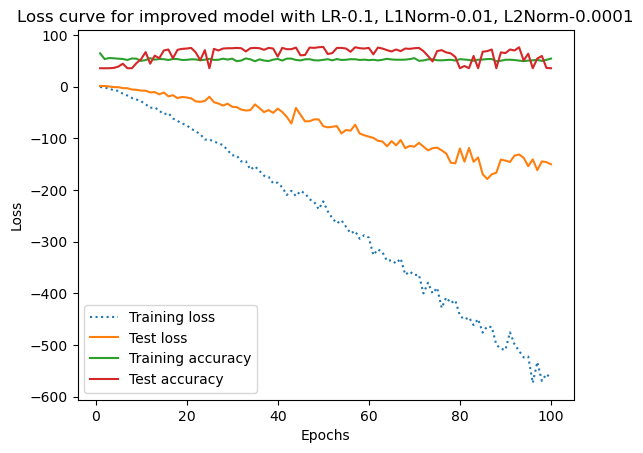

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.001, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.74, 'accuracy': 64.5, 'recall': 0.64, 'precision': 0.77}, {'loss': -2.33, 'accuracy': 52.38, 'recall': 0.52, 'precision': 0.59}, {'loss': -5.68, 'accuracy': 55.0, 'recall': 0.55, 'precision': 0.65}, {'loss': -9.23, 'accuracy': 54.75, 'recall': 0.55, 'precision': 0.65}, {'loss': -11.64, 'accuracy': 52.62, 'recall': 0.53, 'precision': 0.65}, {'loss': -16.0, 'accuracy': 51.75, 'recall': 0.52, 'precision': 0.58}, {'loss': -20.26, 'accuracy': 52.25, 'recall': 0.52, 'precision': 0.65}, {'loss': -22.97, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.66}, {'loss': -32.21, 'accuracy': 55.12, 'recall': 0.55, 'precision': 0.67}, {'loss': -33.58, 'accuracy': 53.88, 'recall': 0.54, 'precision': 0.65}, {'loss': -36.7, 'accuracy': 52.62, 'recall': 0.53, 'precision': 0.62}, {'loss': -43.84, 'accuracy': 53.62, 'recall': 0.54, 'precision': 0

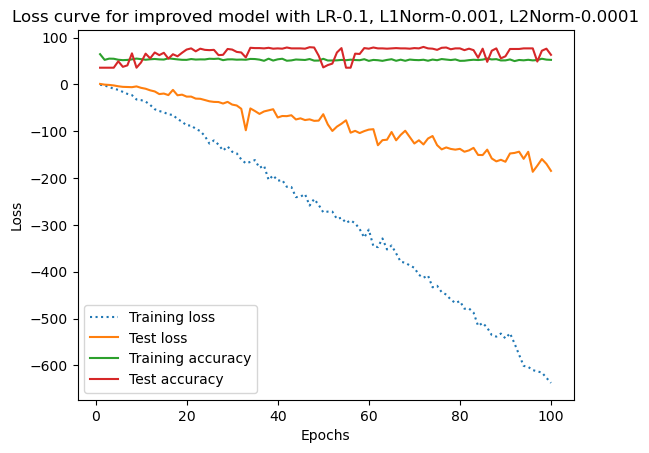

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.0001, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.87, 'accuracy': 66.0, 'recall': 0.66, 'precision': 0.81}, {'loss': -2.82, 'accuracy': 56.12, 'recall': 0.56, 'precision': 0.73}, {'loss': -5.45, 'accuracy': 56.12, 'recall': 0.56, 'precision': 0.75}, {'loss': -9.27, 'accuracy': 56.25, 'recall': 0.56, 'precision': 0.73}, {'loss': -13.07, 'accuracy': 54.0, 'recall': 0.54, 'precision': 0.7}, {'loss': -17.02, 'accuracy': 54.5, 'recall': 0.55, 'precision': 0.73}, {'loss': -19.75, 'accuracy': 57.0, 'recall': 0.57, 'precision': 0.75}, {'loss': -23.06, 'accuracy': 55.38, 'recall': 0.55, 'precision': 0.75}, {'loss': -27.75, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.7}, {'loss': -33.07, 'accuracy': 55.5, 'recall': 0.56, 'precision': 0.73}, {'loss': -35.95, 'accuracy': 52.5, 'recall': 0.52, 'precision': 0.66}, {'loss': -42.81, 'accuracy': 53.62, 'recall': 0.54, 'precision': 0.6

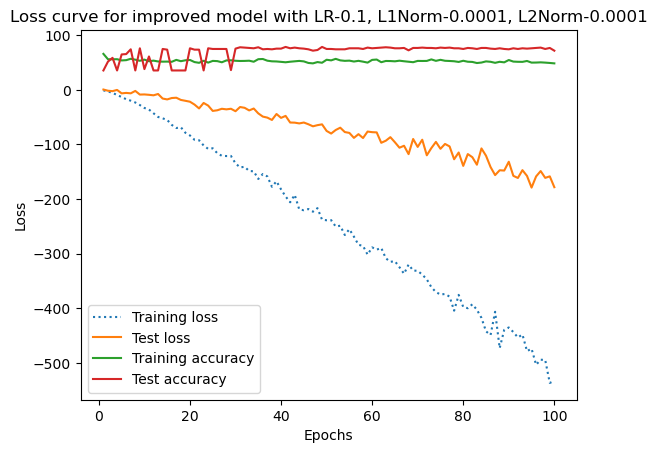

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.01, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.6, 'accuracy': 63.38, 'recall': 0.63, 'precision': 0.78}, {'loss': -1.83, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.61}, {'loss': -3.49, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.64}, {'loss': -6.21, 'accuracy': 53.62, 'recall': 0.54, 'precision': 0.64}, {'loss': -9.15, 'accuracy': 55.38, 'recall': 0.55, 'precision': 0.7}, {'loss': -8.4, 'accuracy': 50.0, 'recall': 0.5, 'precision': 0.55}, {'loss': -12.59, 'accuracy': 56.75, 'recall': 0.57, 'precision': 0.75}, {'loss': -16.91, 'accuracy': 53.88, 'recall': 0.54, 'precision': 0.68}, {'loss': -20.19, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.7}, {'loss': -22.28, 'accuracy': 56.62, 'recall': 0.57, 'precision': 0.75}, {'loss': -26.2, 'accuracy': 58.0, 'recall': 0.58, 'precision': 0.71}, {'loss': -29.93, 'accuracy': 55.88, 'recall': 0.56, 'precision': 0.71}, {'

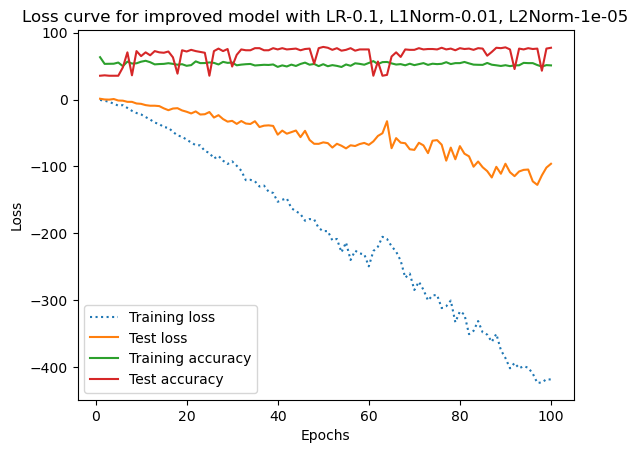

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.001, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.76, 'accuracy': 63.0, 'recall': 0.63, 'precision': 0.77}, {'loss': -2.53, 'accuracy': 54.5, 'recall': 0.55, 'precision': 0.67}, {'loss': -5.52, 'accuracy': 55.88, 'recall': 0.56, 'precision': 0.72}, {'loss': -9.02, 'accuracy': 55.75, 'recall': 0.56, 'precision': 0.69}, {'loss': -12.92, 'accuracy': 55.25, 'recall': 0.55, 'precision': 0.74}, {'loss': -17.13, 'accuracy': 56.0, 'recall': 0.56, 'precision': 0.74}, {'loss': -21.43, 'accuracy': 55.0, 'recall': 0.55, 'precision': 0.7}, {'loss': -25.89, 'accuracy': 55.0, 'recall': 0.55, 'precision': 0.72}, {'loss': -28.66, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.69}, {'loss': -32.33, 'accuracy': 55.38, 'recall': 0.55, 'precision': 0.69}, {'loss': -41.53, 'accuracy': 54.38, 'recall': 0.54, 'precision': 0.67}, {'loss': -43.52, 'accuracy': 54.75, 'recall': 0.55, 'precision': 0.7

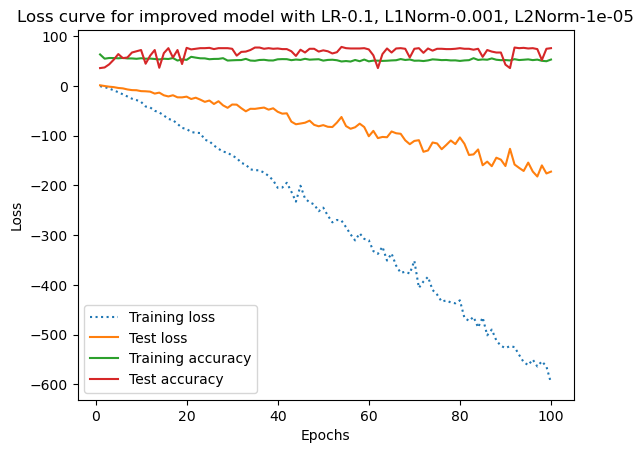

```````````````````````````````````````````````
Model with LR-0.1, L1Norm-0.0001, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': -0.81, 'accuracy': 65.88, 'recall': 0.66, 'precision': 0.79}, {'loss': -2.35, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.68}, {'loss': -4.72, 'accuracy': 55.75, 'recall': 0.56, 'precision': 0.74}, {'loss': -6.4, 'accuracy': 55.88, 'recall': 0.56, 'precision': 0.76}, {'loss': -9.25, 'accuracy': 52.75, 'recall': 0.53, 'precision': 0.67}, {'loss': -13.46, 'accuracy': 52.75, 'recall': 0.53, 'precision': 0.69}, {'loss': -17.78, 'accuracy': 54.75, 'recall': 0.55, 'precision': 0.71}, {'loss': -21.17, 'accuracy': 52.5, 'recall': 0.52, 'precision': 0.66}, {'loss': -26.27, 'accuracy': 53.88, 'recall': 0.54, 'precision': 0.67}, {'loss': -27.99, 'accuracy': 54.75, 'recall': 0.55, 'precision': 0.71}, {'loss': -34.7, 'accuracy': 51.0, 'recall': 0.51, 'precision': 0.61}, {'loss': -38.02, 'accuracy': 53.25, 'recall': 0.53, 'precision': 0

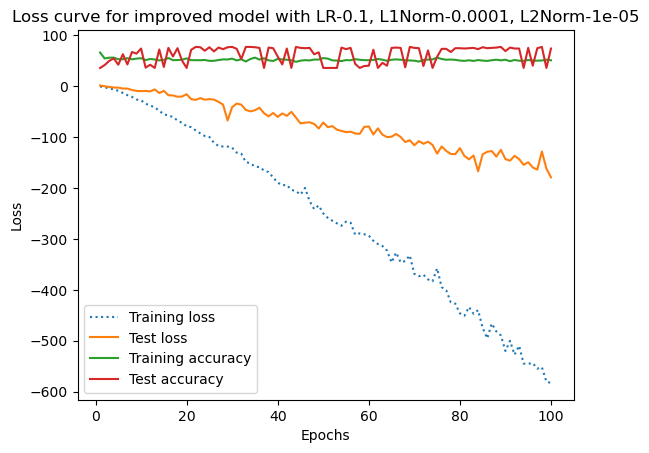

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.01, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.42, 'accuracy': 54.88, 'recall': 0.55, 'precision': 0.77}, {'loss': 0.29, 'accuracy': 55.88, 'recall': 0.56, 'precision': 0.78}, {'loss': 0.25, 'accuracy': 59.0, 'recall': 0.59, 'precision': 0.81}, {'loss': 0.18, 'accuracy': 57.5, 'recall': 0.57, 'precision': 0.82}, {'loss': 0.19, 'accuracy': 59.0, 'recall': 0.59, 'precision': 0.82}, {'loss': 0.1, 'accuracy': 58.25, 'recall': 0.58, 'precision': 0.82}, {'loss': 0.03, 'accuracy': 59.88, 'recall': 0.6, 'precision': 0.84}, {'loss': -0.0, 'accuracy': 60.5, 'recall': 0.6, 'precision': 0.84}, {'loss': -0.01, 'accuracy': 60.12, 'recall': 0.6, 'precision': 0.83}, {'loss': -0.07, 'accuracy': 59.62, 'recall': 0.6, 'precision': 0.84}, {'loss': -0.15, 'accuracy': 62.5, 'recall': 0.62, 'precision': 0.85}, {'loss': -0.21, 'accuracy': 57.75, 'recall': 0.58, 'precision': 0.83}, {'loss': -0.24, 

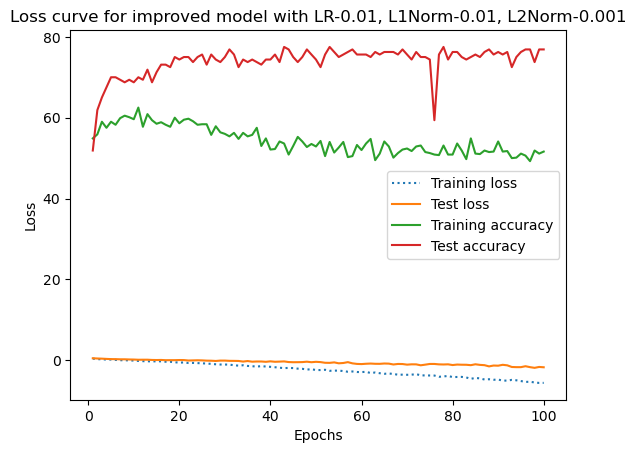

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.001, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.59, 'accuracy': 58.25, 'recall': 0.58, 'precision': 0.76}, {'loss': 0.48, 'accuracy': 55.5, 'recall': 0.56, 'precision': 0.76}, {'loss': 0.38, 'accuracy': 59.0, 'recall': 0.59, 'precision': 0.79}, {'loss': 0.28, 'accuracy': 60.38, 'recall': 0.6, 'precision': 0.81}, {'loss': 0.23, 'accuracy': 60.75, 'recall': 0.61, 'precision': 0.81}, {'loss': 0.18, 'accuracy': 58.75, 'recall': 0.59, 'precision': 0.8}, {'loss': 0.12, 'accuracy': 61.12, 'recall': 0.61, 'precision': 0.83}, {'loss': 0.05, 'accuracy': 60.88, 'recall': 0.61, 'precision': 0.82}, {'loss': 0.0, 'accuracy': 61.38, 'recall': 0.61, 'precision': 0.84}, {'loss': -0.06, 'accuracy': 59.88, 'recall': 0.6, 'precision': 0.82}, {'loss': -0.14, 'accuracy': 59.25, 'recall': 0.59, 'precision': 0.79}, {'loss': -0.15, 'accuracy': 59.25, 'recall': 0.59, 'precision': 0.83}, {'loss': -0.

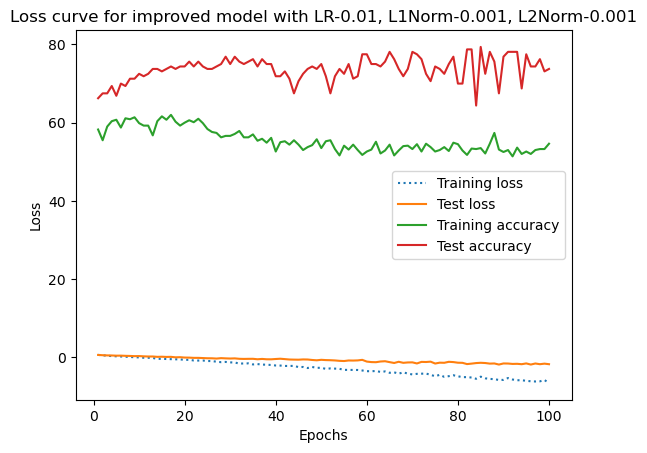

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.0001, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.57, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.72}, {'loss': 0.41, 'accuracy': 55.12, 'recall': 0.55, 'precision': 0.77}, {'loss': 0.32, 'accuracy': 58.25, 'recall': 0.58, 'precision': 0.79}, {'loss': 0.24, 'accuracy': 59.25, 'recall': 0.59, 'precision': 0.81}, {'loss': 0.19, 'accuracy': 59.12, 'recall': 0.59, 'precision': 0.81}, {'loss': 0.12, 'accuracy': 56.88, 'recall': 0.57, 'precision': 0.8}, {'loss': 0.04, 'accuracy': 59.62, 'recall': 0.6, 'precision': 0.82}, {'loss': -0.07, 'accuracy': 58.62, 'recall': 0.59, 'precision': 0.83}, {'loss': -0.09, 'accuracy': 60.88, 'recall': 0.61, 'precision': 0.83}, {'loss': -0.18, 'accuracy': 59.38, 'recall': 0.59, 'precision': 0.83}, {'loss': -0.24, 'accuracy': 59.25, 'recall': 0.59, 'precision': 0.81}, {'loss': -0.38, 'accuracy': 60.38, 'recall': 0.6, 'precision': 0.84}, {'loss

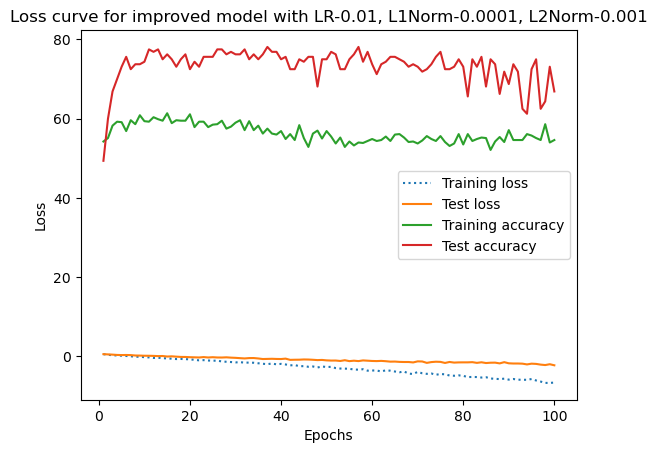

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.01, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.7, 'accuracy': 57.75, 'recall': 0.58, 'precision': 0.75}, {'loss': 0.51, 'accuracy': 60.75, 'recall': 0.61, 'precision': 0.81}, {'loss': 0.43, 'accuracy': 59.5, 'recall': 0.6, 'precision': 0.81}, {'loss': 0.36, 'accuracy': 60.0, 'recall': 0.6, 'precision': 0.82}, {'loss': 0.3, 'accuracy': 60.12, 'recall': 0.6, 'precision': 0.81}, {'loss': 0.23, 'accuracy': 59.5, 'recall': 0.6, 'precision': 0.82}, {'loss': 0.2, 'accuracy': 60.0, 'recall': 0.6, 'precision': 0.83}, {'loss': 0.1, 'accuracy': 62.25, 'recall': 0.62, 'precision': 0.84}, {'loss': 0.1, 'accuracy': 62.75, 'recall': 0.63, 'precision': 0.85}, {'loss': 0.09, 'accuracy': 60.62, 'recall': 0.61, 'precision': 0.83}, {'loss': 0.03, 'accuracy': 60.5, 'recall': 0.6, 'precision': 0.84}, {'loss': -0.01, 'accuracy': 62.0, 'recall': 0.62, 'precision': 0.85}, {'loss': -0.08, 'accuracy

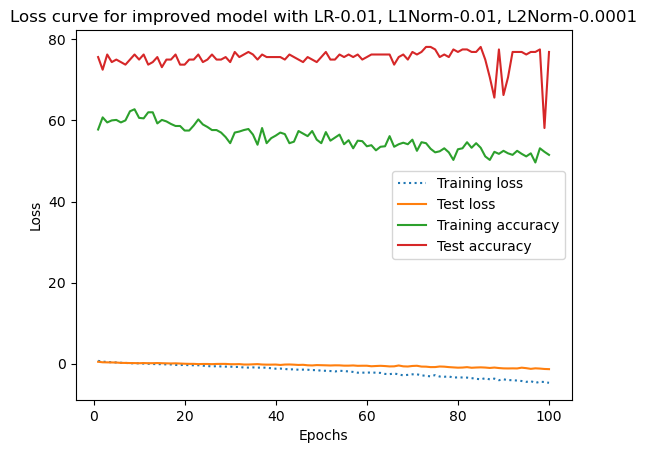

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.001, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.54, 'accuracy': 58.62, 'recall': 0.59, 'precision': 0.75}, {'loss': 0.4, 'accuracy': 58.12, 'recall': 0.58, 'precision': 0.78}, {'loss': 0.25, 'accuracy': 61.0, 'recall': 0.61, 'precision': 0.83}, {'loss': 0.17, 'accuracy': 61.62, 'recall': 0.62, 'precision': 0.83}, {'loss': 0.11, 'accuracy': 60.75, 'recall': 0.61, 'precision': 0.83}, {'loss': 0.01, 'accuracy': 59.75, 'recall': 0.6, 'precision': 0.82}, {'loss': -0.08, 'accuracy': 61.5, 'recall': 0.62, 'precision': 0.83}, {'loss': -0.11, 'accuracy': 63.0, 'recall': 0.63, 'precision': 0.83}, {'loss': -0.19, 'accuracy': 61.88, 'recall': 0.62, 'precision': 0.83}, {'loss': -0.22, 'accuracy': 62.62, 'recall': 0.63, 'precision': 0.85}, {'loss': -0.37, 'accuracy': 62.0, 'recall': 0.62, 'precision': 0.85}, {'loss': -0.36, 'accuracy': 60.38, 'recall': 0.6, 'precision': 0.83}, {'loss': 

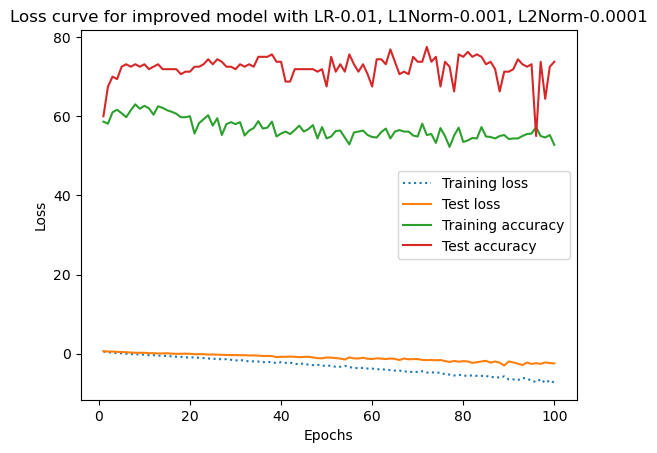

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.0001, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.47, 'accuracy': 58.12, 'recall': 0.58, 'precision': 0.77}, {'loss': 0.3, 'accuracy': 62.12, 'recall': 0.62, 'precision': 0.83}, {'loss': 0.17, 'accuracy': 60.75, 'recall': 0.61, 'precision': 0.83}, {'loss': 0.16, 'accuracy': 62.12, 'recall': 0.62, 'precision': 0.83}, {'loss': 0.08, 'accuracy': 62.12, 'recall': 0.62, 'precision': 0.85}, {'loss': -0.02, 'accuracy': 62.5, 'recall': 0.62, 'precision': 0.84}, {'loss': -0.08, 'accuracy': 62.0, 'recall': 0.62, 'precision': 0.83}, {'loss': -0.15, 'accuracy': 63.62, 'recall': 0.64, 'precision': 0.85}, {'loss': -0.19, 'accuracy': 60.0, 'recall': 0.6, 'precision': 0.83}, {'loss': -0.27, 'accuracy': 60.62, 'recall': 0.61, 'precision': 0.85}, {'loss': -0.33, 'accuracy': 60.88, 'recall': 0.61, 'precision': 0.83}, {'loss': -0.37, 'accuracy': 60.0, 'recall': 0.6, 'precision': 0.82}, {'loss'

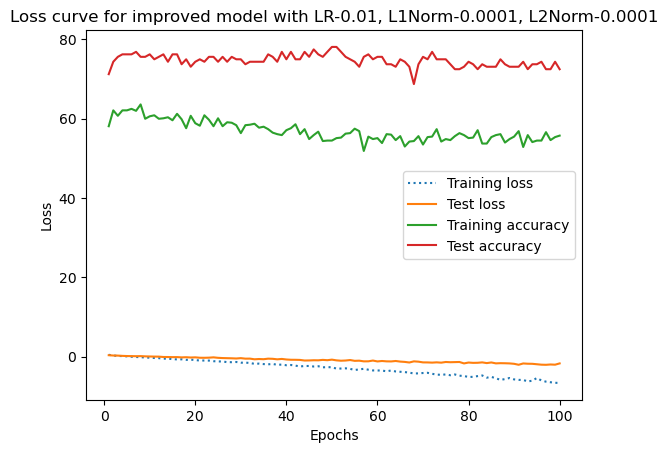

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.01, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.45, 'accuracy': 54.88, 'recall': 0.55, 'precision': 0.74}, {'loss': 0.29, 'accuracy': 57.0, 'recall': 0.57, 'precision': 0.78}, {'loss': 0.22, 'accuracy': 59.38, 'recall': 0.59, 'precision': 0.83}, {'loss': 0.17, 'accuracy': 58.25, 'recall': 0.58, 'precision': 0.8}, {'loss': 0.05, 'accuracy': 61.25, 'recall': 0.61, 'precision': 0.84}, {'loss': 0.04, 'accuracy': 61.38, 'recall': 0.61, 'precision': 0.85}, {'loss': -0.0, 'accuracy': 60.0, 'recall': 0.6, 'precision': 0.81}, {'loss': -0.06, 'accuracy': 60.75, 'recall': 0.61, 'precision': 0.83}, {'loss': -0.19, 'accuracy': 61.75, 'recall': 0.62, 'precision': 0.83}, {'loss': -0.17, 'accuracy': 60.12, 'recall': 0.6, 'precision': 0.83}, {'loss': -0.25, 'accuracy': 60.12, 'recall': 0.6, 'precision': 0.83}, {'loss': -0.37, 'accuracy': 60.12, 'recall': 0.6, 'precision': 0.82}, {'loss': -0.

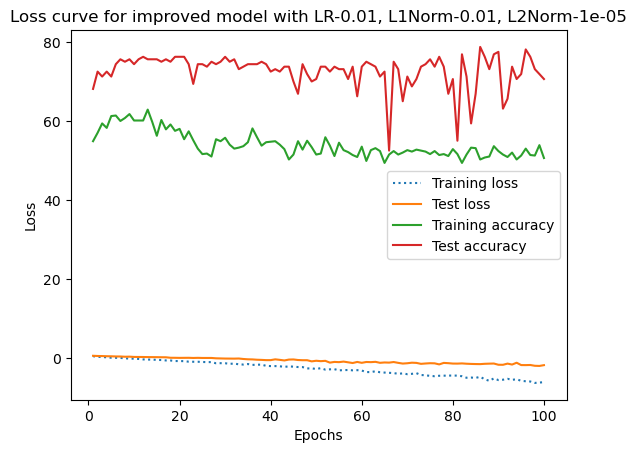

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.001, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.42, 'accuracy': 57.12, 'recall': 0.57, 'precision': 0.8}, {'loss': 0.27, 'accuracy': 60.5, 'recall': 0.6, 'precision': 0.84}, {'loss': 0.19, 'accuracy': 59.75, 'recall': 0.6, 'precision': 0.84}, {'loss': 0.15, 'accuracy': 60.12, 'recall': 0.6, 'precision': 0.83}, {'loss': 0.11, 'accuracy': 59.5, 'recall': 0.6, 'precision': 0.81}, {'loss': 0.01, 'accuracy': 61.0, 'recall': 0.61, 'precision': 0.83}, {'loss': -0.03, 'accuracy': 60.38, 'recall': 0.6, 'precision': 0.84}, {'loss': -0.12, 'accuracy': 61.0, 'recall': 0.61, 'precision': 0.83}, {'loss': -0.15, 'accuracy': 60.25, 'recall': 0.6, 'precision': 0.82}, {'loss': -0.26, 'accuracy': 61.62, 'recall': 0.62, 'precision': 0.84}, {'loss': -0.34, 'accuracy': 62.62, 'recall': 0.63, 'precision': 0.86}, {'loss': -0.41, 'accuracy': 59.0, 'recall': 0.59, 'precision': 0.82}, {'loss': -0.38,

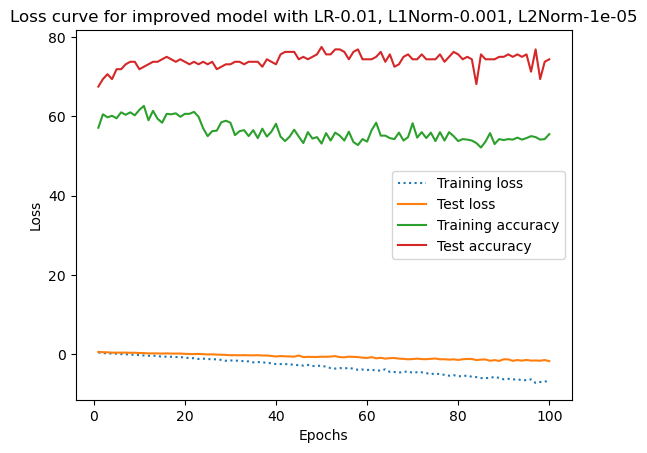

```````````````````````````````````````````````
Model with LR-0.01, L1Norm-0.0001, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.56, 'accuracy': 55.75, 'recall': 0.56, 'precision': 0.74}, {'loss': 0.47, 'accuracy': 53.25, 'recall': 0.53, 'precision': 0.75}, {'loss': 0.37, 'accuracy': 55.62, 'recall': 0.56, 'precision': 0.77}, {'loss': 0.28, 'accuracy': 56.12, 'recall': 0.56, 'precision': 0.79}, {'loss': 0.19, 'accuracy': 58.88, 'recall': 0.59, 'precision': 0.81}, {'loss': 0.19, 'accuracy': 59.75, 'recall': 0.6, 'precision': 0.82}, {'loss': 0.12, 'accuracy': 56.62, 'recall': 0.57, 'precision': 0.79}, {'loss': 0.0, 'accuracy': 58.25, 'recall': 0.58, 'precision': 0.79}, {'loss': -0.04, 'accuracy': 60.0, 'recall': 0.6, 'precision': 0.84}, {'loss': 0.01, 'accuracy': 58.5, 'recall': 0.58, 'precision': 0.81}, {'loss': -0.1, 'accuracy': 59.75, 'recall': 0.6, 'precision': 0.82}, {'loss': -0.1, 'accuracy': 57.75, 'recall': 0.58, 'precision': 0.83}, {'loss': -0.2

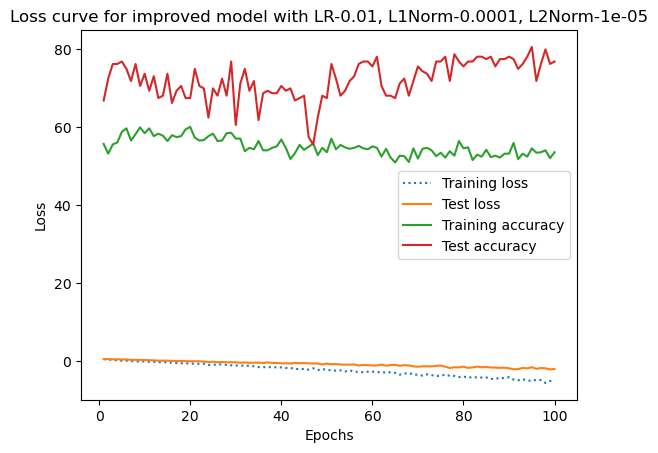

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.01, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.85, 'accuracy': 50.75, 'recall': 0.51, 'precision': 0.71}, {'loss': 0.81, 'accuracy': 54.62, 'recall': 0.55, 'precision': 0.74}, {'loss': 0.78, 'accuracy': 55.38, 'recall': 0.55, 'precision': 0.77}, {'loss': 0.77, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.75}, {'loss': 0.76, 'accuracy': 56.12, 'recall': 0.56, 'precision': 0.76}, {'loss': 0.75, 'accuracy': 56.88, 'recall': 0.57, 'precision': 0.77}, {'loss': 0.76, 'accuracy': 56.38, 'recall': 0.56, 'precision': 0.75}, {'loss': 0.77, 'accuracy': 52.62, 'recall': 0.53, 'precision': 0.75}, {'loss': 0.73, 'accuracy': 60.62, 'recall': 0.61, 'precision': 0.79}, {'loss': 0.73, 'accuracy': 57.62, 'recall': 0.58, 'precision': 0.77}, {'loss': 0.73, 'accuracy': 56.62, 'recall': 0.57, 'precision': 0.78}, {'loss': 0.7, 'accuracy': 58.12, 'recall': 0.58, 'precision': 0.78}, {'loss': 0

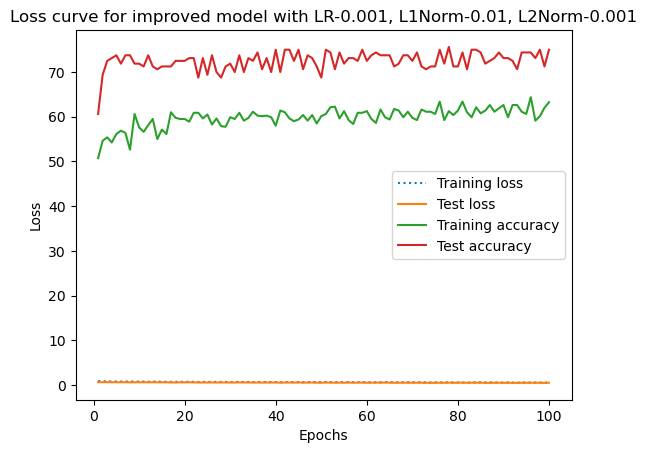

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.001, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.62, 'accuracy': 52.5, 'recall': 0.52, 'precision': 0.72}, {'loss': 0.56, 'accuracy': 55.75, 'recall': 0.56, 'precision': 0.76}, {'loss': 0.56, 'accuracy': 54.0, 'recall': 0.54, 'precision': 0.75}, {'loss': 0.53, 'accuracy': 53.62, 'recall': 0.54, 'precision': 0.75}, {'loss': 0.54, 'accuracy': 54.62, 'recall': 0.55, 'precision': 0.73}, {'loss': 0.54, 'accuracy': 53.75, 'recall': 0.54, 'precision': 0.75}, {'loss': 0.53, 'accuracy': 56.12, 'recall': 0.56, 'precision': 0.76}, {'loss': 0.49, 'accuracy': 56.75, 'recall': 0.57, 'precision': 0.78}, {'loss': 0.5, 'accuracy': 56.0, 'recall': 0.56, 'precision': 0.77}, {'loss': 0.52, 'accuracy': 55.0, 'recall': 0.55, 'precision': 0.75}, {'loss': 0.51, 'accuracy': 56.38, 'recall': 0.56, 'precision': 0.76}, {'loss': 0.53, 'accuracy': 52.75, 'recall': 0.53, 'precision': 0.73}, {'loss': 0.49

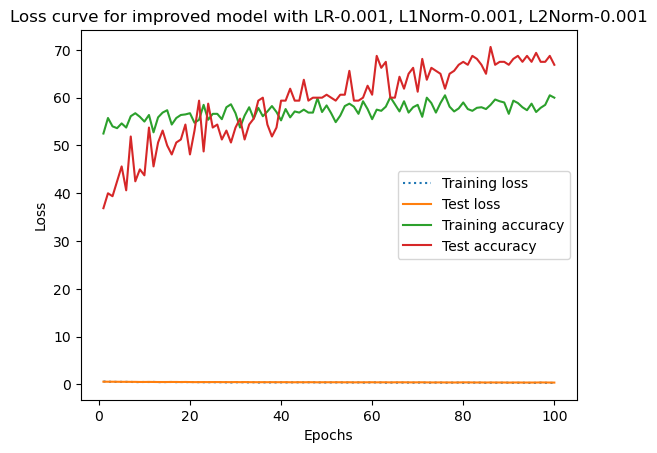

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.0001, L2Norm-0.001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.65, 'accuracy': 51.25, 'recall': 0.51, 'precision': 0.71}, {'loss': 0.64, 'accuracy': 52.38, 'recall': 0.52, 'precision': 0.72}, {'loss': 0.61, 'accuracy': 53.62, 'recall': 0.54, 'precision': 0.73}, {'loss': 0.61, 'accuracy': 52.88, 'recall': 0.53, 'precision': 0.74}, {'loss': 0.64, 'accuracy': 50.5, 'recall': 0.5, 'precision': 0.7}, {'loss': 0.62, 'accuracy': 52.0, 'recall': 0.52, 'precision': 0.72}, {'loss': 0.6, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.74}, {'loss': 0.61, 'accuracy': 52.12, 'recall': 0.52, 'precision': 0.72}, {'loss': 0.59, 'accuracy': 54.5, 'recall': 0.55, 'precision': 0.75}, {'loss': 0.59, 'accuracy': 54.12, 'recall': 0.54, 'precision': 0.75}, {'loss': 0.6, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.73}, {'loss': 0.62, 'accuracy': 50.62, 'recall': 0.51, 'precision': 0.7}, {'loss': 0.58, '

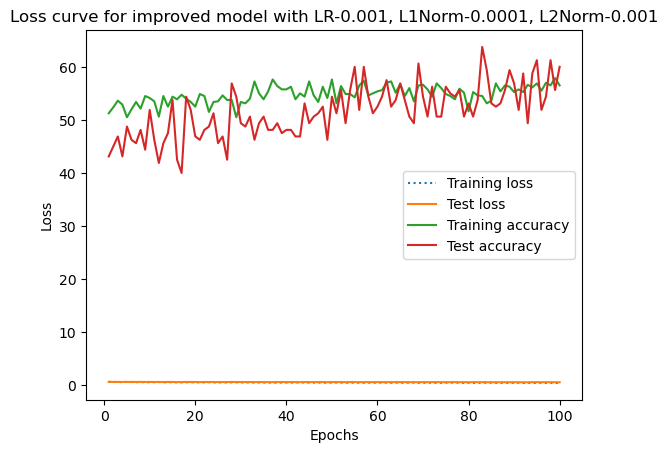

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.01, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.73, 'accuracy': 51.62, 'recall': 0.52, 'precision': 0.71}, {'loss': 0.72, 'accuracy': 53.0, 'recall': 0.53, 'precision': 0.71}, {'loss': 0.73, 'accuracy': 51.25, 'recall': 0.51, 'precision': 0.7}, {'loss': 0.71, 'accuracy': 53.25, 'recall': 0.53, 'precision': 0.72}, {'loss': 0.71, 'accuracy': 51.25, 'recall': 0.51, 'precision': 0.72}, {'loss': 0.72, 'accuracy': 50.62, 'recall': 0.51, 'precision': 0.71}, {'loss': 0.72, 'accuracy': 49.75, 'recall': 0.5, 'precision': 0.69}, {'loss': 0.68, 'accuracy': 56.0, 'recall': 0.56, 'precision': 0.75}, {'loss': 0.68, 'accuracy': 52.88, 'recall': 0.53, 'precision': 0.73}, {'loss': 0.67, 'accuracy': 56.62, 'recall': 0.57, 'precision': 0.75}, {'loss': 0.69, 'accuracy': 52.25, 'recall': 0.52, 'precision': 0.73}, {'loss': 0.69, 'accuracy': 53.88, 'recall': 0.54, 'precision': 0.72}, {'loss': 0.6

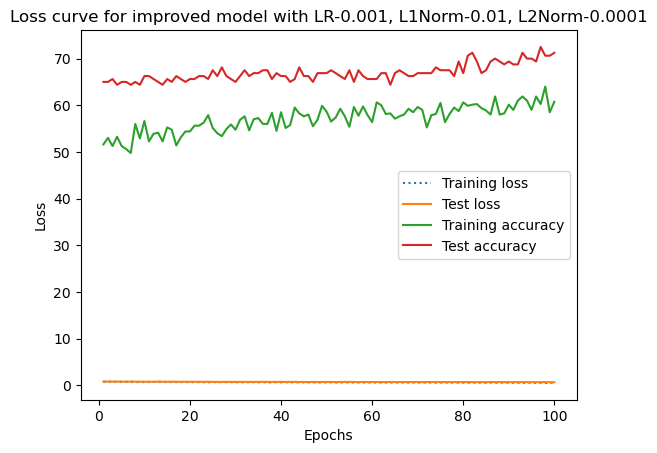

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.001, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.89, 'accuracy': 49.5, 'recall': 0.5, 'precision': 0.69}, {'loss': 0.89, 'accuracy': 48.88, 'recall': 0.49, 'precision': 0.68}, {'loss': 0.86, 'accuracy': 49.38, 'recall': 0.49, 'precision': 0.7}, {'loss': 0.85, 'accuracy': 49.25, 'recall': 0.49, 'precision': 0.69}, {'loss': 0.83, 'accuracy': 51.88, 'recall': 0.52, 'precision': 0.71}, {'loss': 0.83, 'accuracy': 50.62, 'recall': 0.51, 'precision': 0.71}, {'loss': 0.85, 'accuracy': 48.88, 'recall': 0.49, 'precision': 0.69}, {'loss': 0.84, 'accuracy': 52.12, 'recall': 0.52, 'precision': 0.72}, {'loss': 0.79, 'accuracy': 53.12, 'recall': 0.53, 'precision': 0.72}, {'loss': 0.79, 'accuracy': 51.38, 'recall': 0.51, 'precision': 0.72}, {'loss': 0.8, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.73}, {'loss': 0.82, 'accuracy': 49.0, 'recall': 0.49, 'precision': 0.7}, {'loss': 0.77

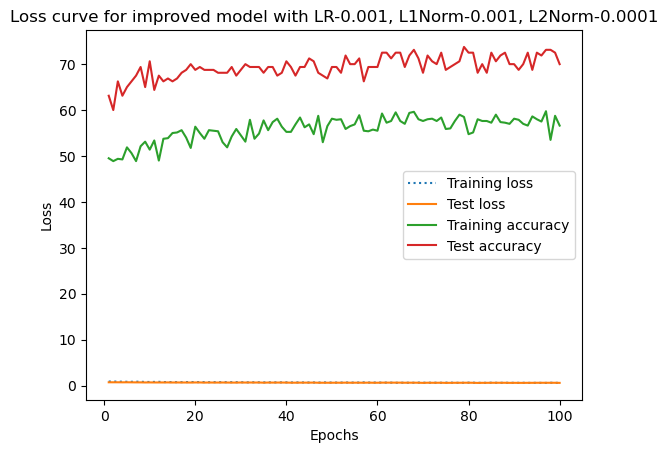

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.0001, L2Norm-0.0001
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.86, 'accuracy': 53.88, 'recall': 0.54, 'precision': 0.73}, {'loss': 0.87, 'accuracy': 51.38, 'recall': 0.51, 'precision': 0.71}, {'loss': 0.83, 'accuracy': 51.12, 'recall': 0.51, 'precision': 0.72}, {'loss': 0.81, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.74}, {'loss': 0.84, 'accuracy': 53.75, 'recall': 0.54, 'precision': 0.73}, {'loss': 0.8, 'accuracy': 54.88, 'recall': 0.55, 'precision': 0.75}, {'loss': 0.8, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.74}, {'loss': 0.81, 'accuracy': 53.25, 'recall': 0.53, 'precision': 0.73}, {'loss': 0.8, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.73}, {'loss': 0.77, 'accuracy': 56.75, 'recall': 0.57, 'precision': 0.76}, {'loss': 0.81, 'accuracy': 56.0, 'recall': 0.56, 'precision': 0.76}, {'loss': 0.8, 'accuracy': 55.25, 'recall': 0.55, 'precision': 0.74}, {'loss': 0.

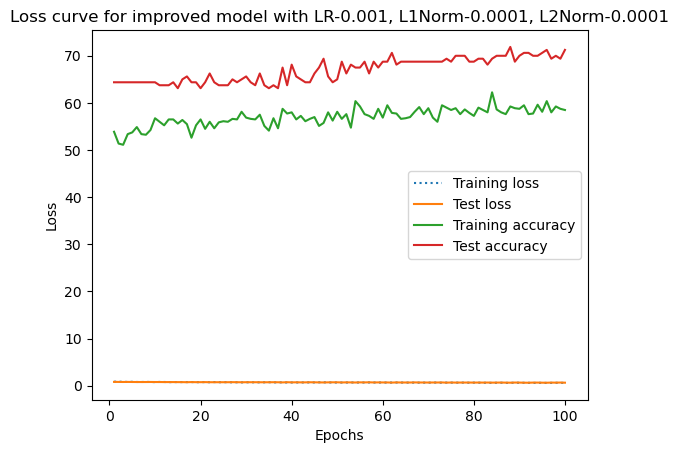

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.01, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.57, 'accuracy': 49.88, 'recall': 0.5, 'precision': 0.67}, {'loss': 0.57, 'accuracy': 49.88, 'recall': 0.5, 'precision': 0.67}, {'loss': 0.54, 'accuracy': 48.5, 'recall': 0.48, 'precision': 0.67}, {'loss': 0.53, 'accuracy': 51.62, 'recall': 0.52, 'precision': 0.68}, {'loss': 0.52, 'accuracy': 52.0, 'recall': 0.52, 'precision': 0.73}, {'loss': 0.52, 'accuracy': 53.62, 'recall': 0.54, 'precision': 0.74}, {'loss': 0.51, 'accuracy': 51.5, 'recall': 0.52, 'precision': 0.73}, {'loss': 0.51, 'accuracy': 51.0, 'recall': 0.51, 'precision': 0.7}, {'loss': 0.5, 'accuracy': 52.25, 'recall': 0.52, 'precision': 0.73}, {'loss': 0.52, 'accuracy': 54.12, 'recall': 0.54, 'precision': 0.74}, {'loss': 0.5, 'accuracy': 49.5, 'recall': 0.5, 'precision': 0.67}, {'loss': 0.48, 'accuracy': 52.62, 'recall': 0.53, 'precision': 0.71}, {'loss': 0.47, 'accu

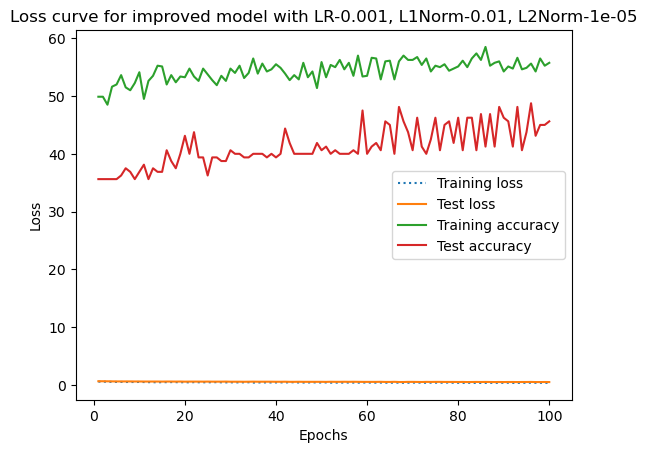

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.001, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.56, 'accuracy': 52.5, 'recall': 0.52, 'precision': 0.73}, {'loss': 0.59, 'accuracy': 49.62, 'recall': 0.5, 'precision': 0.68}, {'loss': 0.52, 'accuracy': 53.25, 'recall': 0.53, 'precision': 0.74}, {'loss': 0.55, 'accuracy': 49.88, 'recall': 0.5, 'precision': 0.69}, {'loss': 0.53, 'accuracy': 51.38, 'recall': 0.51, 'precision': 0.72}, {'loss': 0.54, 'accuracy': 50.62, 'recall': 0.51, 'precision': 0.7}, {'loss': 0.54, 'accuracy': 50.88, 'recall': 0.51, 'precision': 0.72}, {'loss': 0.5, 'accuracy': 53.75, 'recall': 0.54, 'precision': 0.76}, {'loss': 0.49, 'accuracy': 52.5, 'recall': 0.52, 'precision': 0.73}, {'loss': 0.5, 'accuracy': 53.0, 'recall': 0.53, 'precision': 0.76}, {'loss': 0.48, 'accuracy': 54.25, 'recall': 0.54, 'precision': 0.76}, {'loss': 0.48, 'accuracy': 53.38, 'recall': 0.53, 'precision': 0.76}, {'loss': 0.47, '

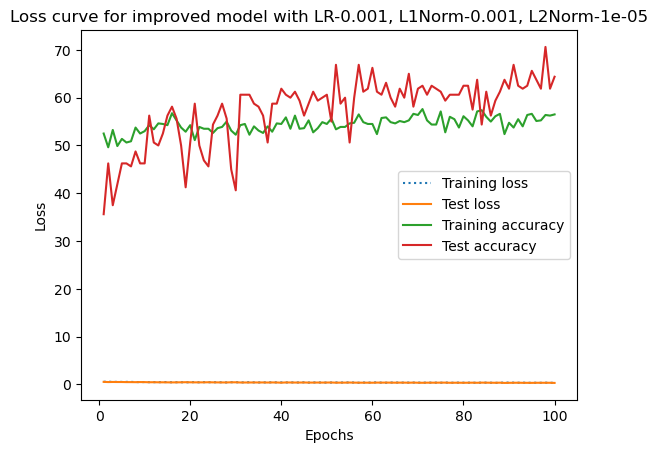

```````````````````````````````````````````````
Model with LR-0.001, L1Norm-0.0001, L2Norm-1e-05
Epoch 50
Epoch 100
------------------
Train Metrics: 
 [{'loss': 0.59, 'accuracy': 49.12, 'recall': 0.49, 'precision': 0.68}, {'loss': 0.56, 'accuracy': 52.88, 'recall': 0.53, 'precision': 0.71}, {'loss': 0.52, 'accuracy': 51.62, 'recall': 0.52, 'precision': 0.7}, {'loss': 0.51, 'accuracy': 54.12, 'recall': 0.54, 'precision': 0.75}, {'loss': 0.5, 'accuracy': 52.88, 'recall': 0.53, 'precision': 0.73}, {'loss': 0.52, 'accuracy': 52.75, 'recall': 0.53, 'precision': 0.73}, {'loss': 0.5, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.74}, {'loss': 0.49, 'accuracy': 53.62, 'recall': 0.54, 'precision': 0.76}, {'loss': 0.5, 'accuracy': 52.12, 'recall': 0.52, 'precision': 0.72}, {'loss': 0.5, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.74}, {'loss': 0.46, 'accuracy': 55.38, 'recall': 0.55, 'precision': 0.78}, {'loss': 0.49, 'accuracy': 53.5, 'recall': 0.54, 'precision': 0.75}, {'loss': 0.5, '

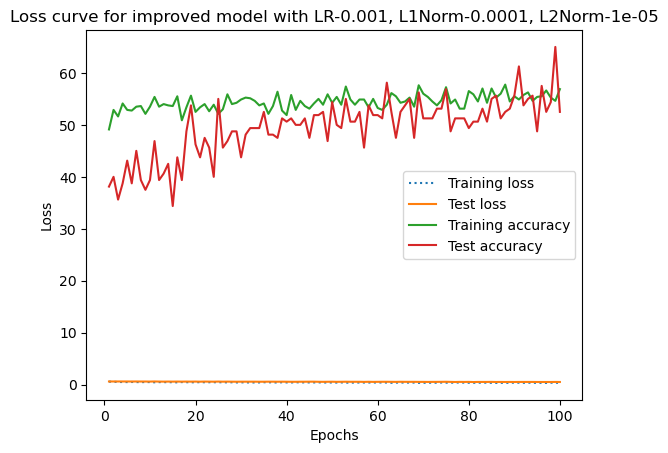

In [691]:
lrs = [0.1, 0.01, 0.001]
l1Lambdas = [0.01, 0.001, 0.0001]
l2wds = [1e-3, 1e-4, 1e-5]

for lr in lrs:
        for l2wd in l2wds:
            for l1Lambda in l1Lambdas:
                print("```````````````````````````````````````````````")
                print(f"Model with LR-{lr}, L1Norm-{l1Lambda}, L2Norm-{l2wd}")
                improvedNetwork = ImprovedNetwork()
                # print(improvedNetwork)
                device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
                # print(device)
                improvedNetwork.to(device)


                criterion = nn.BCEWithLogitsLoss()
                optimiser = optim.Adagrad(improvedNetwork.parameters(), lr=lr, weight_decay=l2wd)

                epochs = 100
                trainMetrics, testMetrics = fit_and_evaluate(
                    improvedNetwork, trainLoader, testLoader, criterion, optimiser, l1Lambda, epochs
                )

                plot_curves(trainMetrics, testMetrics, lr, l1Lambda, l2wd)

0.001, 0.001, 1e-4

In [731]:
improvedNetwork = ImprovedNetwork()
# print(improvedNetwork)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
improvedNetwork.to(device)

cpu


ImprovedNetwork(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (norm1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.25, inplace=False)
  (out): Linear(in_features=8, out_features=1, bias=True)
)

In [732]:
import torch.optim as optim

# HingeEmbeddingLoss
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.Adagrad(improvedNetwork.parameters(), lr=0.001, weight_decay=1e-4)

In [733]:
epochs = 500
trainMetrics, testMetrics = fit_and_evaluate(
    improvedNetwork, trainLoader, testLoader, criterion, optimiser, 0.0001, epochs, save = True
)

Epoch 50
Epoch 100
Epoch 150
Epoch 200
Epoch 250
Epoch 300
Epoch 350
Epoch 400
Epoch 450
Epoch 500
------------------
Train Metrics: 
 [{'loss': 0.77, 'accuracy': 48.5, 'recall': 0.48, 'precision': 0.67}, {'loss': 0.78, 'accuracy': 46.62, 'recall': 0.47, 'precision': 0.65}, {'loss': 0.75, 'accuracy': 49.38, 'recall': 0.49, 'precision': 0.67}, {'loss': 0.73, 'accuracy': 49.88, 'recall': 0.5, 'precision': 0.7}, {'loss': 0.72, 'accuracy': 51.5, 'recall': 0.52, 'precision': 0.71}, {'loss': 0.72, 'accuracy': 49.88, 'recall': 0.5, 'precision': 0.69}, {'loss': 0.75, 'accuracy': 46.0, 'recall': 0.46, 'precision': 0.65}, {'loss': 0.73, 'accuracy': 49.0, 'recall': 0.49, 'precision': 0.68}, {'loss': 0.73, 'accuracy': 49.12, 'recall': 0.49, 'precision': 0.67}, {'loss': 0.7, 'accuracy': 50.75, 'recall': 0.51, 'precision': 0.71}, {'loss': 0.71, 'accuracy': 48.0, 'recall': 0.48, 'precision': 0.68}, {'loss': 0.71, 'accuracy': 48.38, 'recall': 0.48, 'precision': 0.67}, {'loss': 0.69, 'accuracy': 49.5, 

Maximum train accuracy - 60.12 and maximum test accuracy is - 75.62


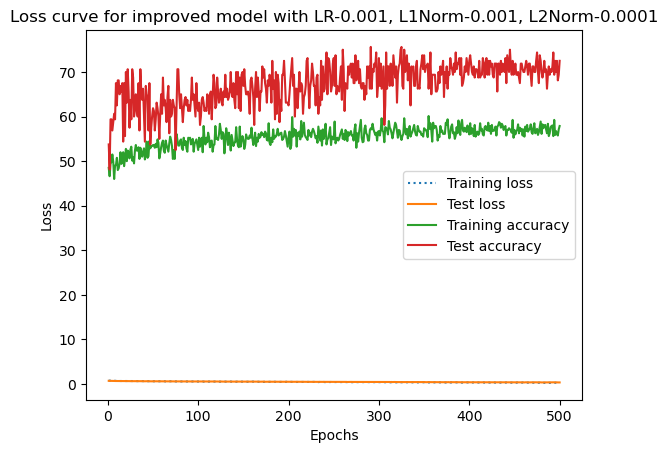

In [734]:
plot_curves(trainMetrics, testMetrics, 0.001, 0.001, 1e-4, True)